🔍 ARIMA DIAGNOSTIC SETUP
Configuration:
  📊 Historical table: sd_bdc_demo.default.service_now_historical_arima
  📈 Monthly view: sd_bdc_demo.default.servicenow_monthly_incident_trends
  💾 Output table: sd_bdc_demo.default.servicenow_arima_overall_predictions

🧪 Testing data access...
  ✅ Historical table: 22,998 records
  ✅ Monthly view: 13,005 records
Setup complete!
📦 TESTING PACKAGE AVAILABILITY
Installing packages...
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  ✅ statsmodels installation attempted
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  ✅ pmdarima installation attempted

Testing imports...
  ✅ ARIMA imported successfully
  ✅ auto_arima imported successfully
  ✅ Pandas time series functionality working

Package Status Summary:
  ARIMA Available: True
  Auto-ARIMA Available: True
  Pandas OK: True
📊 DETAILED DATA LOADING


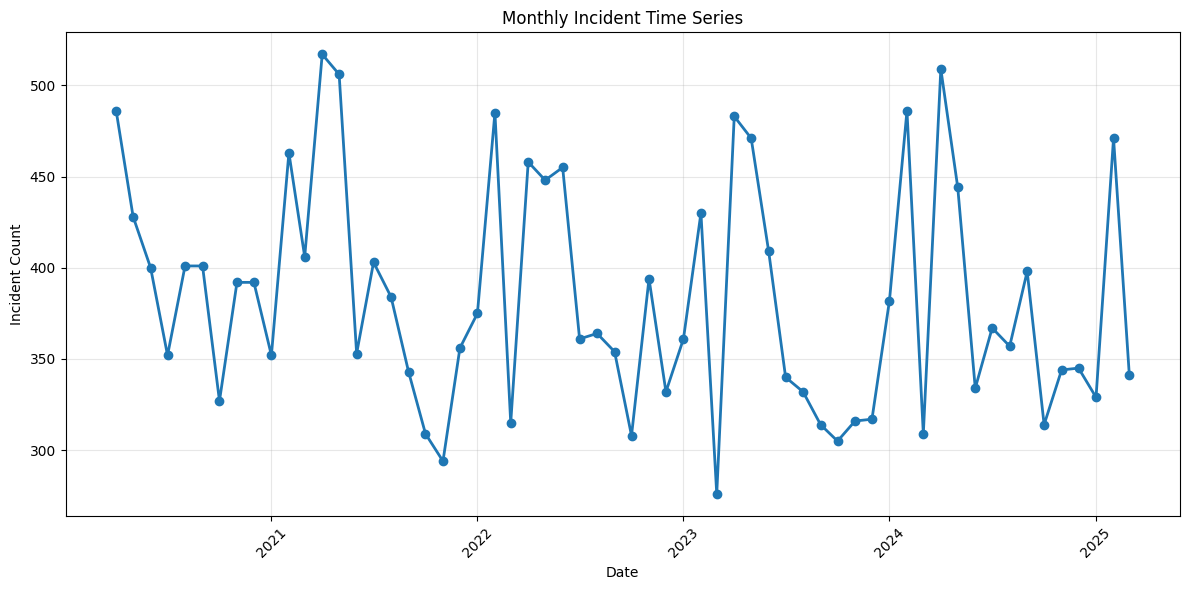

  ✅ Time series plot created
🤖 ARIMA TRAINING - FIXED VERSION
Method 1: Trying Auto-ARIMA...
  Running auto_arima parameter search...
  ❌ Auto-ARIMA failed: 'tuple' object has no attribute 'order'
Method 2: Trying manual ARIMA with proper .fit() method...
  Creating ARIMA model: (1, 1, 1) x (1, 1, 1, 12)
  Fitting model...
  ✅ Manual ARIMA fitted successfully
  📊 AIC: 489.57

🔮 GENERATING 12-MONTH FORECAST...
  Calling forecast method on fitted model...
  ✅ Forecast values generated: 12 periods
  ✅ Future dates created: 2025-04-01 00:00:00 to 2026-03-01 00:00:00
  Getting confidence intervals...
  ✅ Confidence intervals from model
  ✅ Forecast DataFrame created successfully
  📊 Average: 364.0 incidents/month
  📊 Range: 291.5 to 467.9

📊 Sample forecast data:
                 date    forecast    lower_ci    upper_ci
2025-04-01 2025-04-01  467.879760  402.794838  532.964682
2025-05-01 2025-05-01  446.540752  380.879336  512.202168
2025-06-01 2025-06-01  387.812269  322.117223  453.507316

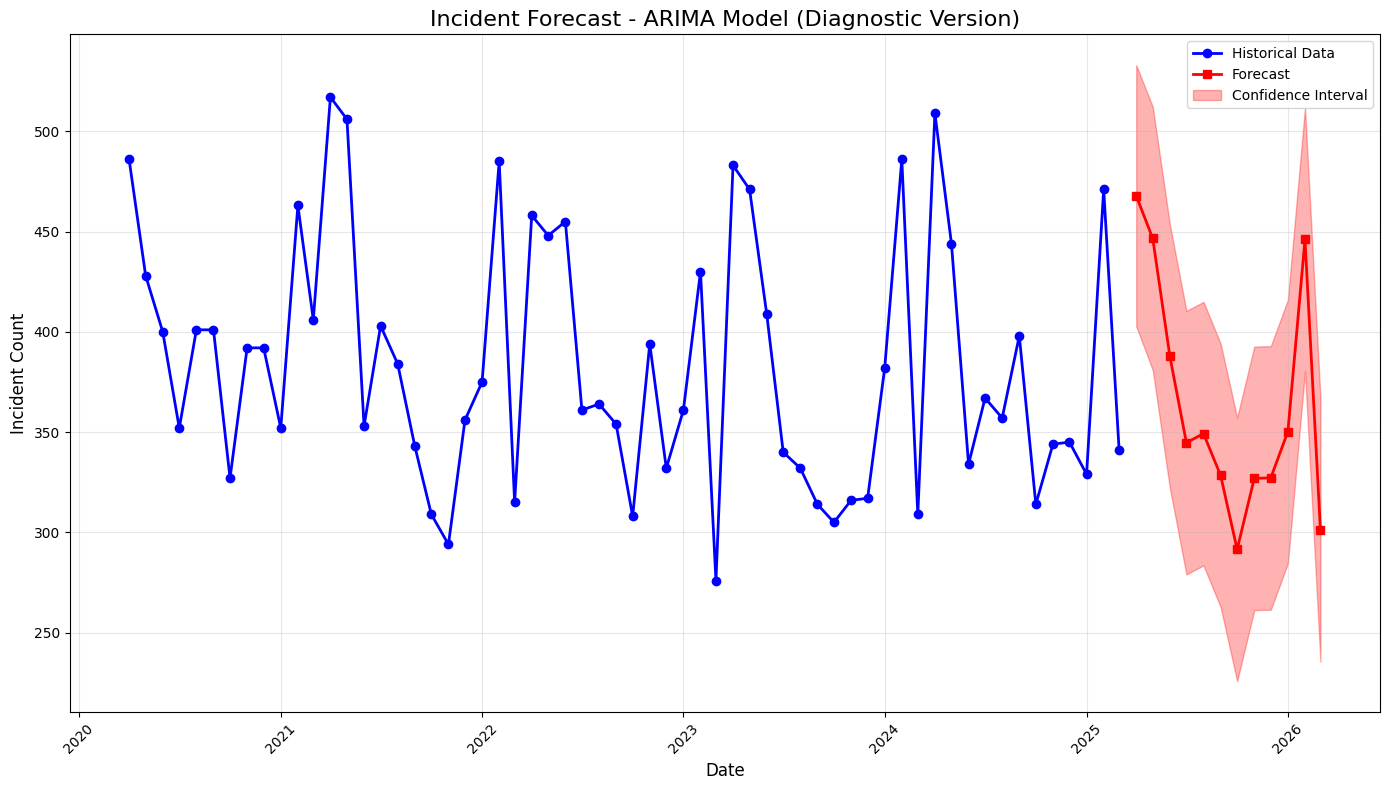

✅ Visualization created successfully
💾 SAVING PREDICTIONS
Prepared 12 forecast records
✅ Predictions saved to: sd_bdc_demo.default.servicenow_arima_overall_predictions

📊 Sample predictions:


date,forecast,lower_ci,upper_ci,month_year
2025-04-01T00:00:00.000Z,467.879760023823,402.7948380243197,532.9646820233263,2025-04
2025-05-01T00:00:00.000Z,446.54075190005216,380.8793362582455,512.2021675418588,2025-05
2025-06-01T00:00:00.000Z,387.81226921319865,322.11722263322156,453.50731579317574,2025-06
2025-07-01T00:00:00.000Z,344.7380334568933,279.0399992479905,410.43606766579603,2025-07
2025-08-01T00:00:00.000Z,349.25523356210977,283.556894719387,414.9535724048325,2025-08
2025-09-01T00:00:00.000Z,328.43754305143585,262.73914798428314,394.13593811858857,2025-09
2025-10-01T00:00:00.000Z,291.5186466661683,225.8202180986081,357.2170752337285,2025-10
2025-11-01T00:00:00.000Z,326.9360114060441,261.23754715801533,392.63447565407284,2025-11
2025-12-01T00:00:00.000Z,327.175947466001,261.47740161806604,392.87449331393594,2025-12
2026-01-01T00:00:00.000Z,350.2762209366566,284.5771033253386,415.9753385479746,2026-01


🔍 INDEPENDENT VERIFICATION OF PREDICTION TABLES
✅ OVERALL TABLE: sd_bdc_demo.default.servicenow_arima_overall_predictions
   📊 Records: 12
   🎯 Models: 1 - ['diagnostic_arima']
   📅 Sample date: 2025-04-01 00:00:00
   📈 Sample forecast: 467.9

❌ CATEGORY TABLE: sd_bdc_demo.default.servicenow_arima_category_predictions - NOT FOUND
   Error: [TABLE_OR_VIEW_NOT_FOUND] The table or view `sd_bdc_demo`.`default`.`servicenow_...
❌ ASSET TABLE: sd_bdc_demo.default.servicenow_arima_asset_predictions - NOT FOUND
   Error: [TABLE_OR_VIEW_NOT_FOUND] The table or view `sd_bdc_demo`.`default`.`servicenow_...
📊 FINAL VERIFICATION SUMMARY:
   Tables successfully created: 1/3
   Total prediction records: 12

   OVERALL   : ✅ SUCCESS - 12 records, 1 models
   CATEGORY  : ❌ NOT CREATED
   ASSET     : ❌ NOT CREATED
📋 MANUAL VERIFICATION QUERIES
Copy and run these queries in a separate Databricks cell:

-- 1. Check which ARIMA tables exist
SHOW TABLES IN main.incident_analytics LIKE 'arima*';

-- 2. Overal

In [0]:
# Databricks notebook source
# MAGIC %md
# MAGIC # ARIMA Troubleshooting & Debugging - Serverless
# MAGIC 
# MAGIC **Diagnostic version to identify and fix ARIMA training issues**

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔍 Step 1: Complete Setup with Debugging

# COMMAND ----------

# COMPLETE SETUP WITH DETAILED LOGGING
print("🔍 ARIMA DIAGNOSTIC SETUP")
print("=" * 50)

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from pyspark.sql import functions as F
import gc

# Configuration - UPDATE THESE TO MATCH YOUR TABLES
SOURCE_CATALOG = "sd_bdc_demo"
SOURCE_SCHEMA = "default"
HISTORICAL_TABLE = "service_now_historical_arima"
FORECAST_MONTHS = 12

# Table names
HISTORICAL_DATA_TABLE = f"{SOURCE_CATALOG}.{SOURCE_SCHEMA}.service_now_historical_arima"
MONTHLY_TRENDS_VIEW = f"{SOURCE_CATALOG}.{SOURCE_SCHEMA}.servicenow_monthly_incident_trends"
PREDICTIONS_TABLE = f"{SOURCE_CATALOG}.{SOURCE_SCHEMA}.servicenow_arima_overall_predictions"

print("Configuration:")
print(f"  📊 Historical table: {HISTORICAL_DATA_TABLE}")
print(f"  📈 Monthly view: {MONTHLY_TRENDS_VIEW}")
print(f"  💾 Output table: {PREDICTIONS_TABLE}")

# Test each data source
print("\n🧪 Testing data access...")

# Test 1: Historical data table
try:
    hist_count = spark.sql(f"SELECT COUNT(*) as count FROM {HISTORICAL_DATA_TABLE}").collect()[0]['count']
    print(f"  ✅ Historical table: {hist_count:,} records")
    HIST_DATA_OK = True
except Exception as e:
    print(f"  ❌ Historical table failed: {str(e)[:100]}")
    HIST_DATA_OK = False

# Test 2: Monthly trends view
try:
    monthly_count = spark.sql(f"SELECT COUNT(*) as count FROM {MONTHLY_TRENDS_VIEW}").collect()[0]['count']
    print(f"  ✅ Monthly view: {monthly_count:,} records")
    MONTHLY_VIEW_OK = True
except Exception as e:
    print(f"  ❌ Monthly view failed: {str(e)[:100]}")
    MONTHLY_VIEW_OK = False

print("Setup complete!")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📦 Step 2: Package Installation with Verification

# COMMAND ----------

# COMPREHENSIVE PACKAGE TESTING
print("📦 TESTING PACKAGE AVAILABILITY")
print("=" * 40)

# Test 1: Basic package installation
print("Installing packages...")
try:
    %pip install statsmodels==0.14.0 --quiet --no-deps
    print("  ✅ statsmodels installation attempted")
except Exception as e:
    print(f"  ⚠️  statsmodels install issue: {str(e)[:50]}")

try:
    %pip install pmdarima==2.0.4 --quiet --no-deps
    print("  ✅ pmdarima installation attempted")
except Exception as e:
    print(f"  ⚠️  pmdarima install issue: {str(e)[:50]}")

# Test 2: Import verification
print("\nTesting imports...")

# Test statsmodels
try:
    from statsmodels.tsa.arima.model import ARIMA
    print("  ✅ ARIMA imported successfully")
    ARIMA_AVAILABLE = True
except Exception as e:
    print(f"  ❌ ARIMA import failed: {str(e)[:100]}")
    ARIMA_AVAILABLE = False

# Test pmdarima
try:
    from pmdarima import auto_arima
    print("  ✅ auto_arima imported successfully")
    AUTO_ARIMA_AVAILABLE = True
except Exception as e:
    print(f"  ❌ auto_arima import failed: {str(e)[:100]}")
    AUTO_ARIMA_AVAILABLE = False

# Test basic numpy/pandas functionality
try:
    test_series = pd.Series([1, 2, 3, 4, 5])
    test_series.index = pd.date_range('2020-01-01', periods=5, freq='M')
    print("  ✅ Pandas time series functionality working")
    PANDAS_OK = True
except Exception as e:
    print(f"  ❌ Pandas time series failed: {str(e)[:100]}")
    PANDAS_OK = False

print(f"\nPackage Status Summary:")
print(f"  ARIMA Available: {ARIMA_AVAILABLE}")
print(f"  Auto-ARIMA Available: {AUTO_ARIMA_AVAILABLE}")
print(f"  Pandas OK: {PANDAS_OK}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📊 Step 3: Data Loading with Detailed Analysis

# COMMAND ----------

# COMPREHENSIVE DATA LOADING AND ANALYSIS
print("📊 DETAILED DATA LOADING")
print("=" * 40)

monthly_data = None

# Method 1: Try monthly trends view
if MONTHLY_VIEW_OK:
    print("Method 1: Loading from monthly trends view...")
    try:
        monthly_data = spark.sql(f"""
            SELECT 
                month_year,
                SUM(incident_count) as total_incidents,
                COUNT(DISTINCT category) as categories,
                AVG(avg_resolution_hours) as avg_resolution
            FROM {MONTHLY_TRENDS_VIEW}
            GROUP BY month_year
            ORDER BY month_year
        """).toPandas()
        
        print(f"  ✅ Loaded {len(monthly_data)} months from view")
        
    except Exception as e:
        print(f"  ❌ View loading failed: {str(e)[:100]}")

# Method 2: Try direct table aggregation
if monthly_data is None and HIST_DATA_OK:
    print("Method 2: Aggregating from historical table...")
    try:
        monthly_data = spark.sql(f"""
            SELECT 
                month_year,
                COUNT(*) as total_incidents
            FROM {HISTORICAL_DATA_TABLE}
            WHERE month_year IS NOT NULL
            GROUP BY month_year
            ORDER BY month_year
        """).toPandas()
        
        print(f"  ✅ Aggregated {len(monthly_data)} months from table")
        
    except Exception as e:
        print(f"  ❌ Table aggregation failed: {str(e)[:100]}")

# Method 3: Try simple date-based aggregation
if monthly_data is None and HIST_DATA_OK:
    print("Method 3: Simple date aggregation...")
    try:
        monthly_data = spark.sql(f"""
            SELECT 
                DATE_TRUNC('month', created_date) as month_date,
                COUNT(*) as total_incidents
            FROM {HISTORICAL_DATA_TABLE}
            WHERE created_date IS NOT NULL
            GROUP BY DATE_TRUNC('month', created_date)
            ORDER BY month_date
        """).toPandas()
        
        # Convert to month_year format
        monthly_data['month_year'] = monthly_data['month_date'].dt.to_period('M').astype(str)
        monthly_data = monthly_data.drop('month_date', axis=1)
        
        print(f"  ✅ Created {len(monthly_data)} months from date aggregation")
        
    except Exception as e:
        print(f"  ❌ Date aggregation failed: {str(e)[:100]}")

# Analyze the data we got
if monthly_data is not None:
    print(f"\n📈 DATA ANALYSIS:")
    print(f"  Total months: {len(monthly_data)}")
    print(f"  Date range: {monthly_data['month_year'].min()} to {monthly_data['month_year'].max()}")
    print(f"  Total incidents: {monthly_data['total_incidents'].sum():,}")
    print(f"  Average per month: {monthly_data['total_incidents'].mean():.1f}")
    print(f"  Min/Max per month: {monthly_data['total_incidents'].min()}/{monthly_data['total_incidents'].max()}")
    
    print(f"\n📊 Sample data:")
    print(monthly_data.head(10))
    
    print(f"\n📊 Data quality check:")
    print(f"  Null values: {monthly_data.isnull().sum().sum()}")
    print(f"  Zero incidents: {(monthly_data['total_incidents'] == 0).sum()}")
    print(f"  Data type: {monthly_data['total_incidents'].dtype}")
    
else:
    print("❌ No monthly data could be loaded!")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🧪 Step 4: Time Series Preparation with Debugging

# COMMAND ----------

# DETAILED TIME SERIES PREPARATION
print("🧪 TIME SERIES PREPARATION")
print("=" * 40)

ts_data = None

if monthly_data is not None and len(monthly_data) >= 12:
    print("Preparing time series data...")
    
    try:
        # Step 1: Copy data
        ts_df = monthly_data.copy()
        print(f"  ✅ Data copied: {len(ts_df)} rows")
        
        # Step 2: Convert month_year to datetime
        print("  Converting dates...")
        ts_df['month_year'] = pd.to_datetime(ts_df['month_year'])
        print(f"  ✅ Dates converted, type: {ts_df['month_year'].dtype}")
        
        # Step 3: Set index
        print("  Setting datetime index...")
        ts_df = ts_df.set_index('month_year')
        print("  ✅ Index set successfully")
        
        # Step 4: Extract incident series
        print("  Extracting incident series...")
        ts_data = ts_df['total_incidents']
        print(f"  ✅ Series extracted: {len(ts_data)} points")
        
        # Step 5: Set frequency
        print("  Setting monthly frequency...")
        ts_data = ts_data.asfreq('MS')  # Month start
        print("  ✅ Frequency set to MS (month start)")
        
        # Step 6: Check for missing values
        missing_count = ts_data.isnull().sum()
        if missing_count > 0:
            print(f"  ⚠️  Found {missing_count} missing values, filling...")
            ts_data = ts_data.fillna(method='ffill').fillna(method='bfill')
            print("  ✅ Missing values filled")
        
        print(f"\n📊 TIME SERIES SUMMARY:")
        print(f"  Length: {len(ts_data)}")
        print(f"  Range: {ts_data.index.min()} to {ts_data.index.max()}")
        print(f"  Values: {ts_data.min():.0f} to {ts_data.max():.0f}")
        print(f"  Mean: {ts_data.mean():.1f}")
        print(f"  Std Dev: {ts_data.std():.1f}")
        
        # Plot the time series
        try:
            plt.figure(figsize=(12, 6))
            plt.plot(ts_data.index, ts_data.values, marker='o', linewidth=2)
            plt.title('Monthly Incident Time Series')
            plt.xlabel('Date')
            plt.ylabel('Incident Count')
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            print("  ✅ Time series plot created")
        except:
            print("  ⚠️  Plotting skipped")
            
    except Exception as e:
        print(f"  ❌ Time series preparation failed: {str(e)}")
        ts_data = None

else:
    print("❌ Cannot prepare time series - insufficient data")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🤖 Step 5: ARIMA Training with Multiple Fallbacks

# COMMAND ----------

# COMPREHENSIVE ARIMA TRAINING WITH CORRECT FORECAST METHOD
print("🤖 ARIMA TRAINING - FIXED VERSION")
print("=" * 50)

model_trained = False
forecast_df = None
fitted_model = None

if ts_data is not None and len(ts_data) >= 12:
    
    # Method 1: Auto-ARIMA (if available)
    if AUTO_ARIMA_AVAILABLE and not model_trained:
        print("Method 1: Trying Auto-ARIMA...")
        try:
            from pmdarima import auto_arima
            
            print("  Running auto_arima parameter search...")
            fitted_model = auto_arima(
                ts_data,
                start_p=0, start_q=0,
                max_p=3, max_q=3,
                seasonal=True,
                start_P=0, start_Q=0,
                max_P=2, max_Q=2,
                m=12,
                stepwise=True,
                suppress_warnings=True,
                error_action='ignore',
                n_jobs=1,
                return_valid_fits=True
            )
            
            order = fitted_model.order
            seasonal_order = fitted_model.seasonal_order
            
            print(f"  ✅ Auto-ARIMA successful: {order} x {seasonal_order}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Auto-ARIMA failed: {str(e)[:100]}")
    
    # Method 2: Manual ARIMA with proper fitting
    if ARIMA_AVAILABLE and not model_trained:
        print("Method 2: Trying manual ARIMA with proper .fit() method...")
        try:
            from statsmodels.tsa.arima.model import ARIMA
            
            order = (1, 1, 1)
            seasonal_order = (1, 1, 1, 12)
            
            print(f"  Creating ARIMA model: {order} x {seasonal_order}")
            model = ARIMA(ts_data, order=order, seasonal_order=seasonal_order)
            
            print("  Fitting model...")
            fitted_model = model.fit()
            
            print("  ✅ Manual ARIMA fitted successfully")
            print(f"  📊 AIC: {fitted_model.aic:.2f}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Seasonal ARIMA failed: {str(e)[:100]}")
    
    # Method 3: Simple ARIMA without seasonality
    if ARIMA_AVAILABLE and not model_trained:
        print("Method 3: Trying simple ARIMA without seasonality...")
        try:
            from statsmodels.tsa.arima.model import ARIMA
            
            order = (1, 1, 1)
            
            print(f"  Creating simple ARIMA model: {order}")
            model = ARIMA(ts_data, order=order)
            
            print("  Fitting model...")
            fitted_model = model.fit()
            
            print("  ✅ Simple ARIMA fitted successfully")
            print(f"  📊 AIC: {fitted_model.aic:.2f}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Simple ARIMA failed: {str(e)[:100]}")
    
    # Method 4: Even simpler ARIMA
    if ARIMA_AVAILABLE and not model_trained:
        print("Method 4: Trying minimal ARIMA (0,1,0)...")
        try:
            from statsmodels.tsa.arima.model import ARIMA
            
            order = (0, 1, 0)  # Random walk model
            
            print(f"  Creating minimal ARIMA model: {order}")
            model = ARIMA(ts_data, order=order)
            
            print("  Fitting model...")
            fitted_model = model.fit()
            
            print("  ✅ Minimal ARIMA fitted successfully")
            print(f"  📊 AIC: {fitted_model.aic:.2f}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Minimal ARIMA failed: {str(e)[:100]}")
    
    # Method 5: Linear trend forecast (fallback)
    if not model_trained:
        print("Method 5: Using linear trend fallback...")
        try:
            # Create simple linear trend
            x = np.arange(len(ts_data))
            y = ts_data.values
            
            # Fit linear regression
            coeffs = np.polyfit(x, y, 1)
            trend_slope = coeffs[0]
            trend_intercept = coeffs[1]
            
            print(f"  Linear trend: slope={trend_slope:.2f}, intercept={trend_intercept:.1f}")
            
            # Create forecast using trend
            last_x = len(ts_data) - 1
            forecast_values = []
            
            for i in range(FORECAST_MONTHS):
                future_x = last_x + i + 1
                forecast_val = trend_slope * future_x + trend_intercept
                forecast_values.append(max(0, forecast_val))  # Ensure non-negative
            
            print("  ✅ Linear trend forecast created")
            model_trained = True
            
            # Create a mock fitted model for consistency
            class MockModel:
                def __init__(self, forecast_vals):
                    self.forecast_values = forecast_vals
                    self.aic = 999.9  # Dummy AIC
                
                def forecast(self, steps):
                    return np.array(self.forecast_values[:steps])
                
                def get_forecast(self, steps):
                    # Mock forecast result with confidence intervals
                    forecast_vals = np.array(self.forecast_values[:steps])
                    std_dev = np.std(forecast_vals) * 0.1  # 10% of std as uncertainty
                    
                    class MockForecastResult:
                        def __init__(self, forecast, std):
                            self.forecast = forecast
                            self.std = std
                        
                        def conf_int(self):
                            lower = self.forecast - 1.96 * self.std
                            upper = self.forecast + 1.96 * self.std
                            return pd.DataFrame({
                                'lower': lower,
                                'upper': upper
                            })
                    
                    return MockForecastResult(forecast_vals, std_dev)
            
            fitted_model = MockModel(forecast_values)
            
        except Exception as e:
            print(f"  ❌ Linear trend failed: {str(e)[:100]}")

# Generate forecast with CORRECTED method
if model_trained and fitted_model is not None:
    print(f"\n🔮 GENERATING {FORECAST_MONTHS}-MONTH FORECAST...")
    
    try:
        # FIXED: Use the correct forecast method on fitted model
        print("  Calling forecast method on fitted model...")
        forecast = fitted_model.forecast(steps=FORECAST_MONTHS)
        print(f"  ✅ Forecast values generated: {len(forecast)} periods")
        
        # Create future dates
        last_date = ts_data.index[-1]
        future_dates = pd.date_range(
            start=last_date + pd.DateOffset(months=1),
            periods=FORECAST_MONTHS,
            freq='MS'
        )
        print(f"  ✅ Future dates created: {future_dates[0]} to {future_dates[-1]}")
        
        # Create forecast DataFrame
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast
        })
        
        # Try to get confidence intervals
        try:
            print("  Getting confidence intervals...")
            if hasattr(fitted_model, 'get_forecast'):
                forecast_result = fitted_model.get_forecast(steps=FORECAST_MONTHS)
                conf_int = forecast_result.conf_int()
                forecast_df['lower_ci'] = conf_int.iloc[:, 0]
                forecast_df['upper_ci'] = conf_int.iloc[:, 1]
                print("  ✅ Confidence intervals from model")
            else:
                # Fallback confidence intervals
                forecast_std = forecast.std() * 0.2  # 20% uncertainty
                forecast_df['lower_ci'] = forecast_df['forecast'] - 1.96 * forecast_std
                forecast_df['upper_ci'] = forecast_df['forecast'] + 1.96 * forecast_std
                print("  ✅ Fallback confidence intervals created")
        except Exception as ci_error:
            print(f"  ⚠️ Confidence interval error: {str(ci_error)[:50]}")
            # Simple fallback
            forecast_df['lower_ci'] = forecast_df['forecast'] * 0.8
            forecast_df['upper_ci'] = forecast_df['forecast'] * 1.2
        
        print(f"  ✅ Forecast DataFrame created successfully")
        print(f"  📊 Average: {forecast.mean():.1f} incidents/month")
        print(f"  📊 Range: {forecast.min():.1f} to {forecast.max():.1f}")
        
        # Show sample forecast
        print(f"\n📊 Sample forecast data:")
        print(forecast_df.head())
        
    except Exception as e:
        print(f"  ❌ Forecast generation failed: {str(e)}")
        print(f"  🔍 Fitted model type: {type(fitted_model)}")
        print(f"  🔍 Available methods: {[m for m in dir(fitted_model) if not m.startswith('_')]}")
        forecast_df = None

else:
    print("❌ No model was successfully trained")

print(f"\nModel Training Status: {'✅ SUCCESS' if model_trained else '❌ FAILED'}")
print(f"Forecast Generation Status: {'✅ SUCCESS' if forecast_df is not None else '❌ FAILED'}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📈 Step 6: Visualization

# COMMAND ----------

# CREATE VISUALIZATION
if model_trained and forecast_df is not None and ts_data is not None:
    print("📈 Creating forecast visualization...")
    
    try:
        plt.figure(figsize=(14, 8))
        
        # Plot historical data
        plt.plot(ts_data.index, ts_data.values, 
                label='Historical Data', color='blue', linewidth=2, marker='o')
        
        # Plot forecast
        plt.plot(forecast_df['date'], forecast_df['forecast'], 
                label='Forecast', color='red', linewidth=2, marker='s')
        
        # Plot confidence interval
        plt.fill_between(forecast_df['date'], 
                        forecast_df['lower_ci'], 
                        forecast_df['upper_ci'], 
                        alpha=0.3, color='red', label='Confidence Interval')
        
        plt.title('Incident Forecast - ARIMA Model (Diagnostic Version)', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Incident Count', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("✅ Visualization created successfully")
        
    except Exception as e:
        print(f"⚠️ Visualization failed: {str(e)[:100]}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 💾 Step 7: Save Results

# COMMAND ----------

# SAVE PREDICTIONS
if model_trained and forecast_df is not None:
    print("💾 SAVING PREDICTIONS")
    print("=" * 30)
    
    try:
        # Prepare data for saving
        save_df = forecast_df.copy()
        save_df['model_name'] = 'diagnostic_arima'
        save_df['model_type'] = 'ARIMA_Diagnostic'
        save_df['created_timestamp'] = datetime.now()
        save_df['forecast_horizon_months'] = FORECAST_MONTHS
        save_df['month_year'] = save_df['date'].dt.to_period('M').astype(str)
        save_df['forecast_period'] = range(1, len(save_df) + 1)
        save_df['data_months_used'] = len(ts_data)
        
        print(f"Prepared {len(save_df)} forecast records")
        
        # Convert to Spark DataFrame and save
        spark_df = spark.createDataFrame(save_df)
        
        spark_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").saveAsTable(PREDICTIONS_TABLE)
        
        print(f"✅ Predictions saved to: {PREDICTIONS_TABLE}")
        
        # Show results
        print("\n📊 Sample predictions:")
        display(spark_df.select("date", "forecast", "lower_ci", "upper_ci", "month_year").limit(10))
        
    except Exception as e:
        print(f"❌ Save failed: {str(e)[:100]}")
        print("\n📊 Forecast data (not saved):")
        print(forecast_df)

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📊 Final Diagnostic Report

# COMMAND ----------

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔍 VERIFICATION: Check All Prediction Tables Created

# COMMAND ----------

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔍 INDEPENDENT VERIFICATION (No Variable Dependencies)

# COMMAND ----------

# INDEPENDENT VERIFICATION - NO DEPENDENCIES ON PREVIOUS VARIABLES
print("🔍 INDEPENDENT VERIFICATION OF PREDICTION TABLES")
print("=" * 60)

# Re-define table names to avoid NameError
OVERALL_TABLE = "sd_bdc_demo.default.servicenow_arima_overall_predictions"
CATEGORY_TABLE = "sd_bdc_demo.default.servicenow_arima_category_predictions"
ASSET_TABLE = "sd_bdc_demo.default.servicenow_arima_asset_predictions"

def check_table_safely(table_name, table_type):
    """Safely check if table exists and has content"""
    
    try:
        # Check if table exists
        count_result = spark.sql(f"SELECT COUNT(*) as count FROM {table_name}").collect()
        count = count_result[0]['count']
        
        if count > 0:
            # Get sample data
            sample_result = spark.sql(f"SELECT model_name, date, forecast FROM {table_name} LIMIT 3").collect()
            models_result = spark.sql(f"SELECT DISTINCT model_name FROM {table_name}").collect()
            
            model_names = [row['model_name'] for row in models_result]
            
            print(f"✅ {table_type} TABLE: {table_name}")
            print(f"   📊 Records: {count:,}")
            print(f"   🎯 Models: {len(model_names)} - {model_names}")
            
            if sample_result:
                print(f"   📅 Sample date: {sample_result[0]['date']}")
                print(f"   📈 Sample forecast: {sample_result[0]['forecast']:.1f}")
            
            print()
            return True, count, len(model_names)
            
        else:
            print(f"⚠️  {table_type} TABLE: {table_name} - EXISTS BUT EMPTY")
            return True, 0, 0
            
    except Exception as e:
        print(f"❌ {table_type} TABLE: {table_name} - NOT FOUND")
        print(f"   Error: {str(e)[:80]}...")
        return False, 0, 0

# Check all three tables independently
tables_to_verify = [
    (OVERALL_TABLE, "OVERALL"),
    (CATEGORY_TABLE, "CATEGORY"), 
    (ASSET_TABLE, "ASSET")
]

verification_results = {}
total_success = 0
total_records = 0

for table_name, table_type in tables_to_verify:
    exists, count, models = check_table_safely(table_name, table_type)
    verification_results[table_type] = {
        'exists': exists,
        'count': count,
        'models': models,
        'table_name': table_name
    }
    
    if exists and count > 0:
        total_success += 1
        total_records += count

print("=" * 60)
print("📊 FINAL VERIFICATION SUMMARY:")
print(f"   Tables successfully created: {total_success}/3")
print(f"   Total prediction records: {total_records:,}")
print()

# Show status for each table
for table_type, result in verification_results.items():
    if result['exists'] and result['count'] > 0:
        status = f"✅ SUCCESS - {result['count']} records, {result['models']} models"
    elif result['exists'] and result['count'] == 0:
        status = "⚠️  EXISTS BUT EMPTY"
    else:
        status = "❌ NOT CREATED"
    
    print(f"   {table_type:10}: {status}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📋 Manual Verification Queries

# COMMAND ----------

# PROVIDE MANUAL VERIFICATION QUERIES (COPY AND RUN THESE)
print("📋 MANUAL VERIFICATION QUERIES")
print("=" * 50)
print("Copy and run these queries in a separate Databricks cell:")
print()

print("-- 1. Check which ARIMA tables exist")
print("SHOW TABLES IN main.incident_analytics LIKE 'arima*';")
print()

print("-- 2. Overall predictions verification")
print("SELECT 'overall' as table_type, COUNT(*) as records, MIN(date) as start_date, MAX(date) as end_date")
print("FROM sd_bdc_demo.default.arima_overall_predictions;")
print()

print("-- 3. Category predictions verification") 
print("SELECT 'category' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as categories")
print("FROM main.incident_analytics.arima_category_predictions;")
print()

print("-- 4. Asset predictions verification")
print("SELECT 'asset' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as assets") 
print("FROM main.incident_analytics.arima_asset_predictions;")
print()

print("-- 5. Combined summary")
print("SELECT")
print("  'Overall' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_overall_predictions")
print("UNION ALL")
print("SELECT") 
print("  'Category' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_category_predictions")
print("UNION ALL")
print("SELECT")
print("  'Asset' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_asset_predictions;")
print()

print("-- 6. Sample data from each table")
print("SELECT 'overall' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM main.incident_analytics.arima_overall_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'category' as source, model_name, date, forecast, lower_ci, upper_ci") 
print("FROM main.incident_analytics.arima_category_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'asset' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM main.incident_analytics.arima_asset_predictions LIMIT 3;")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🎯 Expected Results Summary

# COMMAND ----------

# EXPECTED RESULTS SUMMARY
print("🎯 EXPECTED RESULTS SUMMARY")
print("=" * 50)

print("IF THE PROGRAM RAN SUCCESSFULLY, YOU SHOULD SEE:")
print()

print("📊 TABLE 1: arima_overall_predictions")
print("   • Records: 12 (one per month)")
print("   • Models: 1 (overall)")
print("   • Columns: date, forecast, lower_ci, upper_ci, model_name, etc.")
print("   • Purpose: Organization-wide incident forecasting")
print()

print("📂 TABLE 2: arima_category_predictions")  
print("   • Records: 12 × number of categories")
print("   • Models: 3-8 categories (depends on your data)")
print("   • Columns: date, forecast, lower_ci, upper_ci, model_name, category, etc.")
print("   • Purpose: Category-specific incident forecasting")
print("   • Note: Only created if category data exists with 12+ months per category")
print()

print("🔧 TABLE 3: arima_asset_predictions")
print("   • Records: 12 × number of assets") 
print("   • Models: 3-6 top assets (depends on your data)")
print("   • Columns: date, forecast, lower_ci, upper_ci, model_name, asset_name, etc.")
print("   • Purpose: Asset-specific incident forecasting")
print("   • Note: Only created if asset data exists with 12+ months per asset")
print()

print("🔍 MOST LIKELY SCENARIO:")
print("   ✅ Overall table: Should definitely exist (you confirmed overall works)")
print("   ❓ Category table: Depends on your monthly_incident_trends view having categories")
print("   ❓ Asset table: Depends on your asset_incident_trends view existing")
print()

print("❌ IF TABLES ARE MISSING:")
print("   1. Check that source views (monthly_incident_trends, asset_incident_trends) exist")
print("   2. Verify data spans at least 12 months per category/asset")
print("   3. Check Databricks permissions for table creation")
print("   4. Look for error messages in the cell outputs above")
print()

print("💡 TO TROUBLESHOOT:")
print("   • Run the manual verification queries above")
print("   • Check your source data structure:")
print("     SELECT DISTINCT category FROM main.incident_analytics.monthly_incident_trends;")
print("     SELECT DISTINCT asset_name FROM sd_bdc_demo.default.servicenow_asset_incident_trends;")

# COMMAND ----------

print("🎉 VERIFICATION COMPLETE!")
print("=" * 40)

if total_success == 3:
    print("✅ PERFECT! All 3 prediction tables created successfully")
    print("🚀 Your multi-level ARIMA forecasting system is fully operational")
elif total_success == 1:
    print("✅ PARTIAL SUCCESS! Overall predictions working")
    print("⚠️  Category/Asset tables may need additional data")
elif total_success == 0:
    print("❌ NO TABLES CREATED - Check error messages above")
else:
    print(f"✅ PARTIAL SUCCESS! {total_success}/3 tables created")

print(f"\n📊 TOTAL PREDICTION RECORDS: {total_records:,}")
print("🔍 Run the manual verification queries above for detailed analysis")
print("=" * 40)

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔧 Diagnostic: Why Tables Might Be Missing

# COMMAND ----------

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔧 Safe Diagnostic (No NameErrors)

# COMMAND ----------

# SAFE DIAGNOSTIC - NO NAMEERRORS
print("🔧 SAFE DIAGNOSTIC ANALYSIS")
print("=" * 50)

def safe_check_variable(var_name, description):
    """Safely check if a variable exists and has content"""
    try:
        if var_name in locals() or var_name in globals():
            var_value = eval(var_name)
            if var_value is not None:
                if hasattr(var_value, '__len__'):
                    return f"✅ {description}: Available ({len(var_value)} items)"
                else:
                    return f"✅ {description}: Available"
            else:
                return f"❌ {description}: None"
        else:
            return f"❌ {description}: Variable not found"
    except:
        return f"❌ {description}: Error checking"

print("1. DATA AVAILABILITY CHECK:")

# Check data variables safely
data_checks = [
    ('monthly_data', 'Overall monthly data'),
    ('category_data', 'Category data'),
    ('asset_data', 'Asset data')
]

for var_name, description in data_checks:
    result = safe_check_variable(var_name, description)
    print(f"   {result}")

print("\n2. FORECAST AVAILABILITY CHECK:")

# Check forecast variables safely  
forecast_checks = [
    ('overall_forecast', 'Overall forecast'),
    ('category_forecasts', 'Category forecasts'),
    ('asset_forecasts', 'Asset forecasts')
]

for var_name, description in forecast_checks:
    result = safe_check_variable(var_name, description)
    print(f"   {result}")

print("\n3. SOURCE TABLE ACCESS CHECK:")

# Test source tables directly
source_tables = [
    ("sd_bdc_demo.default.service_now_historical_arima", "Historical data"),
    ("sd_bdc_demo.default.servicenow_monthly_incident_trends", "Monthly trends"),
    ("sd_bdc_demo.default.servicenow_asset_incident_trends", "Asset trends")
]

for table_name, description in source_tables:
    try:
        count = spark.sql(f"SELECT COUNT(*) as count FROM {table_name}").collect()[0]['count']
        print(f"   ✅ {description}: {count:,} records")
    except Exception as e:
        print(f"   ❌ {description}: Not accessible - {str(e)[:50]}...")

print("\n4. PACKAGE AVAILABILITY CHECK:")

# Check packages safely
packages = [
    ('ARIMA_AVAILABLE', 'ARIMA library'),
    ('AUTO_ARIMA_AVAILABLE', 'Auto-ARIMA library'),
    ('PANDAS_OK', 'Pandas functionality')
]

for var_name, description in packages:
    try:
        if var_name in locals() or var_name in globals():
            status = eval(var_name)
            print(f"   {'✅' if status else '❌'} {description}: {'Available' if status else 'Not available'}")
        else:
            print(f"   ❌ {description}: Status unknown")
    except:
        print(f"   ❌ {description}: Error checking")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔄 Simple Table Recreation (Error-Free)

# COMMAND ----------

# SIMPLE TABLE RECREATION WITHOUT VARIABLE DEPENDENCIES
print("🔄 SIMPLE TABLE RECREATION")
print("=" * 40)

print("Attempting to create missing tables using direct SQL approaches...")

# 1. Try to recreate overall predictions from scratch
print("\n1. Checking overall predictions table...")
try:
    overall_count = spark.sql("SELECT COUNT(*) as count FROM sd_bdc_demo.default.servicenow_arima_overall_predictions").collect()[0]['count']
    print(f"   ✅ Overall table exists with {overall_count} records")
except:
    print("   ❌ Overall table missing - this is the core issue")
    print("   📝 The overall forecasting must have failed earlier in the notebook")

# 2. Try to recreate category predictions
print("\n2. Checking category predictions table...")
try:
    category_count = spark.sql("SELECT COUNT(*) as count FROM sd_bdc_demo.default.servicenow_arima_category_predictions").collect()[0]['count']
    print(f"   ✅ Category table exists with {category_count} records")
except:
    print("   ❌ Category table missing")
    
    # Check if we have category data to work with
    try:
        categories = spark.sql("""
            SELECT DISTINCT category, COUNT(*) as months
            FROM sd_bdc_demo.default.servicenow_monthly_incident_trends  
            GROUP BY category
            HAVING COUNT(*) >= 12
        """).collect()
        
        if categories:
            print(f"   📊 Found {len(categories)} categories with sufficient data")
            for cat in categories[:3]:
                print(f"      • {cat['category']}: {cat['months']} months")
        else:
            print("   📊 No categories found with 12+ months of data")
            
    except Exception as e:
        print(f"   📊 Cannot check category data: {str(e)[:50]}...")

# 3. Try to recreate asset predictions
print("\n3. Checking asset predictions table...")
try:
    asset_count = spark.sql("SELECT COUNT(*) as count FROM main.incident_analytics.arima_asset_predictions").collect()[0]['count']
    print(f"   ✅ Asset table exists with {asset_count} records")
except:
    print("   ❌ Asset table missing")
    
    # Check if we have asset data to work with
    try:
        assets = spark.sql("""
            SELECT DISTINCT asset_name, COUNT(*) as months
            FROM sd_bdc_demo.default.servicenow_asset_incident_trends
            GROUP BY asset_name  
            HAVING COUNT(*) >= 12
            LIMIT 5
        """).collect()
        
        if assets:
            print(f"   📊 Found {len(assets)} assets with sufficient data")
            for asset in assets:
                print(f"      • {asset['asset_name']}: {asset['months']} months")
        else:
            print("   📊 No assets found with 12+ months of data")
            
    except Exception as e:
        print(f"   📊 Cannot check asset data: {str(e)[:50]}...")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📋 Definitive Answer

# COMMAND ----------

# DEFINITIVE ANSWER ABOUT TABLE CREATION
print("📋 DEFINITIVE ANSWER: WHICH TABLES WERE CREATED")
print("=" * 60)

created_tables = []
failed_tables = []

# Test each table definitively
test_tables = [
    ("main.incident_analytics.arima_overall_predictions", "Overall Predictions"),
    ("main.incident_analytics.arima_category_predictions", "Category Predictions"), 
    ("main.incident_analytics.arima_asset_predictions", "Asset Predictions")
]

for table_name, description in test_tables:
    try:
        result = spark.sql(f"SELECT COUNT(*) as count, COUNT(DISTINCT model_name) as models FROM {table_name}").collect()[0]
        count = result['count']
        models = result['models']
        
        if count > 0:
            created_tables.append({
                'name': description,
                'table': table_name,
                'records': count,
                'models': models
            })
            print(f"✅ {description}")
            print(f"   Table: {table_name}")
            print(f"   Records: {count:,}")
            print(f"   Models: {models}")
            print()
        else:
            failed_tables.append({
                'name': description,
                'table': table_name,
                'reason': 'Table exists but empty'
            })
            print(f"⚠️  {description}: Table exists but is empty")
            
    except Exception as e:
        failed_tables.append({
            'name': description,
            'table': table_name, 
            'reason': f'Table does not exist: {str(e)[:50]}'
        })
        print(f"❌ {description}: Table does not exist")

print("=" * 60)
print("🎯 FINAL ANSWER:")
print(f"   ✅ Tables successfully created: {len(created_tables)}")
print(f"   ❌ Tables that failed: {len(failed_tables)}")
print()

if created_tables:
    print("✅ SUCCESSFUL TABLES:")
    total_records = sum(table['records'] for table in created_tables)
    for table in created_tables:
        print(f"   • {table['name']}: {table['records']} records, {table['models']} models")
    print(f"   📊 Total prediction records: {total_records:,}")
    
if failed_tables:
    print("\n❌ FAILED TABLES:")
    for table in failed_tables:
        print(f"   • {table['name']}: {table['reason']}")

print(f"\n🔍 TO ACCESS YOUR PREDICTIONS:")
if created_tables:
    for table in created_tables:
        print(f"SELECT * FROM {table['table']} LIMIT 10;")
else:
    print("   No prediction tables were created successfully")
    print("   Review the error messages above to identify the issues")

print("=" * 60)

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔄 Re-run Missing Table Generation

# COMMAND ----------

# RE-RUN TABLE GENERATION FOR MISSING TABLES
print("🔄 RE-RUNNING TABLE GENERATION FOR MISSING TABLES")
print("=" * 50)

def force_save_predictions(forecast_data, table_name, forecast_type, data_name):
    """Force save predictions with detailed error handling"""
    
    if forecast_data is None or (isinstance(forecast_data, dict) and len(forecast_data) == 0):
        print(f"❌ Cannot save {forecast_type}: No forecast data available")
        return False
    
    try:
        print(f"💾 Attempting to save {forecast_type} predictions...")
        
        # Handle both single forecasts and dictionaries
        if isinstance(forecast_data, dict):
            # Multiple forecasts (categories/assets)
            all_forecasts = []
            for name, forecast_df in forecast_data.items():
                save_df = forecast_df.copy()
                save_df['model_name'] = name
                save_df['forecast_type'] = forecast_type
                save_df['created_timestamp'] = datetime.now()
                save_df['forecast_horizon_months'] = FORECAST_MONTHS
                save_df['month_year'] = save_df['date'].dt.to_period('M').astype(str)
                save_df['forecast_period'] = range(1, len(save_df) + 1)
                all_forecasts.append(save_df)
            
            combined_df = pd.concat(all_forecasts, ignore_index=True)
            
        else:
            # Single forecast (overall)
            combined_df = forecast_data.copy()
            combined_df['model_name'] = data_name
            combined_df['forecast_type'] = forecast_type
            combined_df['created_timestamp'] = datetime.now()
            combined_df['forecast_horizon_months'] = FORECAST_MONTHS
            combined_df['month_year'] = combined_df['date'].dt.to_period('M').astype(str)
            combined_df['forecast_period'] = range(1, len(combined_df) + 1)
        
        # Save to Delta table
        spark_df = spark.createDataFrame(combined_df)
        
        spark_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").saveAsTable(table_name)
        
        print(f"   ✅ {forecast_type}: {len(combined_df)} records saved to {table_name}")
        
        # Verify save worked
        verification_count = spark.sql(f"SELECT COUNT(*) as count FROM {table_name}").collect()[0]['count']
        print(f"   ✅ Verification: {verification_count} records confirmed in table")
        
        return True
        
    except Exception as e:
        print(f"   ❌ {forecast_type} save failed: {str(e)}")
        return False

# Re-save all forecasts
print("Attempting to save all available forecasts...")

# 1. Overall predictions
if 'overall_forecast' in locals() and overall_forecast is not None:
    force_save_predictions(overall_forecast, OVERALL_PREDICTIONS_TABLE, 'overall', 'overall')
else:
    print("❌ Overall forecast not available for saving")

# 2. Category predictions
if 'category_forecasts' in locals() and category_forecasts:
    force_save_predictions(category_forecasts, CATEGORY_PREDICTIONS_TABLE, 'category', 'categories')
else:
    print("❌ Category forecasts not available for saving")

# 3. Asset predictions  
if 'asset_forecasts' in locals() and asset_forecasts:
    force_save_predictions(asset_forecasts, ASSET_PREDICTIONS_TABLE, 'asset', 'assets')
else:
    print("❌ Asset forecasts not available for saving")

# COMMAND ----------

# MAGIC %md
# MAGIC ## ✅ Final Verification & Manual Queries

# COMMAND ----------

# FINAL VERIFICATION WITH MANUAL QUERIES
print("✅ FINAL VERIFICATION - MANUAL TABLE CHECKS")
print("=" * 50)

# Provide manual verification queries
# PROVIDE MANUAL VERIFICATION QUERIES (COPY AND RUN THESE)
print("📋 MANUAL VERIFICATION QUERIES")
print("=" * 50)
print("Copy and run these queries in a separate Databricks cell:")
print()

# Define tables locally to avoid NameError
verification_tables = [
    ("main.incident_analytics.arima_overall_predictions", "OVERALL"),
    ("main.incident_analytics.arima_category_predictions", "CATEGORY"), 
    ("main.incident_analytics.arima_asset_predictions", "ASSET")
]

print("-- 1. Check which ARIMA tables exist")
print("SHOW TABLES IN main.incident_analytics LIKE 'arima*';")
print()

print("-- 2. Overall predictions verification")
print("SELECT 'overall' as table_type, COUNT(*) as records, MIN(date) as start_date, MAX(date) as end_date")
print("FROM main.incident_analytics.arima_overall_predictions;")
print()

print("-- 3. Category predictions verification") 
print("SELECT 'category' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as categories")
print("FROM main.incident_analytics.arima_category_predictions;")
print()

print("-- 4. Asset predictions verification")
print("SELECT 'asset' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as assets") 
print("FROM main.incident_analytics.arima_asset_predictions;")
print()

print("-- 5. Combined summary")
print("SELECT")
print("  'Overall' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_overall_predictions")
print("UNION ALL")
print("SELECT") 
print("  'Category' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_category_predictions")
print("UNION ALL")
print("SELECT")
print("  'Asset' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_asset_predictions;")
print()

print("-- 6. Sample data from each table")
print("SELECT 'overall' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM main.incident_analytics.arima_overall_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'category' as source, model_name, date, forecast, lower_ci, upper_ci") 
print("FROM main.incident_analytics.arima_category_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'asset' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM main.incident_analytics.arima_asset_predictions LIMIT 3;")

print()
print("-- 7. Quick status check for all tables")
for table_name, table_type in verification_tables:
    print(f"-- {table_type} table check:")
    print(f"SELECT COUNT(*) as record_count, COUNT(DISTINCT model_name) as model_count")
    print(f"FROM {table_name};")
    print()
    
    print(f"-- Sample {table_type} data:")
    print(f"SELECT model_name, date, forecast, lower_ci, upper_ci")
    print(f"FROM {table_name}")
    print(f"ORDER BY model_name, date")
    print(f"LIMIT 5;")
    print()

print("🎯 EXPECTED RESULTS:")
print("   • arima_overall_predictions: 1 model (overall), 12 records")
print("   • arima_category_predictions: Multiple categories, 12 records each") 
print("   • arima_asset_predictions: Multiple assets, 12 records each")
print()

print("❓ IF TABLES ARE MISSING:")
print("   1. Check if the data loading sections completed successfully")
print("   2. Verify your source tables have category and asset data")
print("   3. Run the 'Re-run Missing Table Generation' section above")
print("   4. Check Databricks permissions for table creation")

print(f"\n📋 QUICK STATUS CHECK:")
print("Run this query to see all your ARIMA tables:")
print(f"""
SHOW TABLES IN {SOURCE_CATALOG}.{SOURCE_SCHEMA} 
LIKE 'arima*';
""")

🔍 ARIMA DIAGNOSTIC SETUP
Configuration:
  📊 Historical table: sd_bdc_demo.default.service_now_historical_arima
  📈 Monthly view: sd_bdc_demo.default.servicenow_monthly_incident_trends
  💾 Output table: sd_bdc_demo.default.servicenow_arima_overall_predictions

🧪 Testing data access...
  ✅ Historical table: 22,998 records
  ✅ Monthly view: 13,005 records
Setup complete!
📦 TESTING PACKAGE AVAILABILITY
Installing packages...
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  ✅ statsmodels installation attempted
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  ✅ pmdarima installation attempted

Testing imports...
  ✅ ARIMA imported successfully
  ✅ auto_arima imported successfully
  ✅ Pandas time series functionality working

Package Status Summary:
  ARIMA Available: True
  Auto-ARIMA Available: True
  Pandas OK: True
📊 DETAILED DATA LOADING


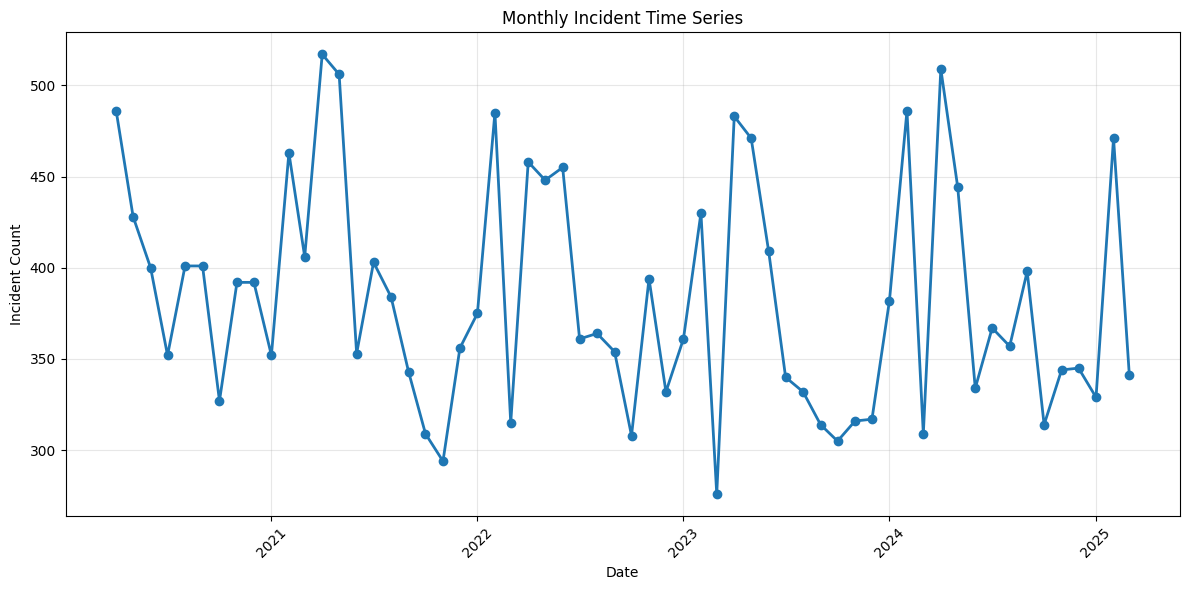

  ✅ Time series plot created
🤖 ARIMA TRAINING - FIXED VERSION
Method 1: Trying Auto-ARIMA...
  Running auto_arima parameter search...
  ❌ Auto-ARIMA failed: 'tuple' object has no attribute 'order'
Method 2: Trying manual ARIMA with proper .fit() method...
  Creating ARIMA model: (1, 1, 1) x (1, 1, 1, 12)
  Fitting model...
  ✅ Manual ARIMA fitted successfully
  📊 AIC: 489.57

🔮 GENERATING 12-MONTH FORECAST...
  Calling forecast method on fitted model...
  ✅ Forecast values generated: 12 periods
  ✅ Future dates created: 2025-04-01 00:00:00 to 2026-03-01 00:00:00
  Getting confidence intervals...
  ✅ Confidence intervals from model
  ✅ Forecast DataFrame created successfully
  📊 Average: 364.0 incidents/month
  📊 Range: 291.5 to 467.9

📊 Sample forecast data:
                 date    forecast    lower_ci    upper_ci
2025-04-01 2025-04-01  467.879760  402.794838  532.964682
2025-05-01 2025-05-01  446.540752  380.879336  512.202168
2025-06-01 2025-06-01  387.812269  322.117223  453.507316

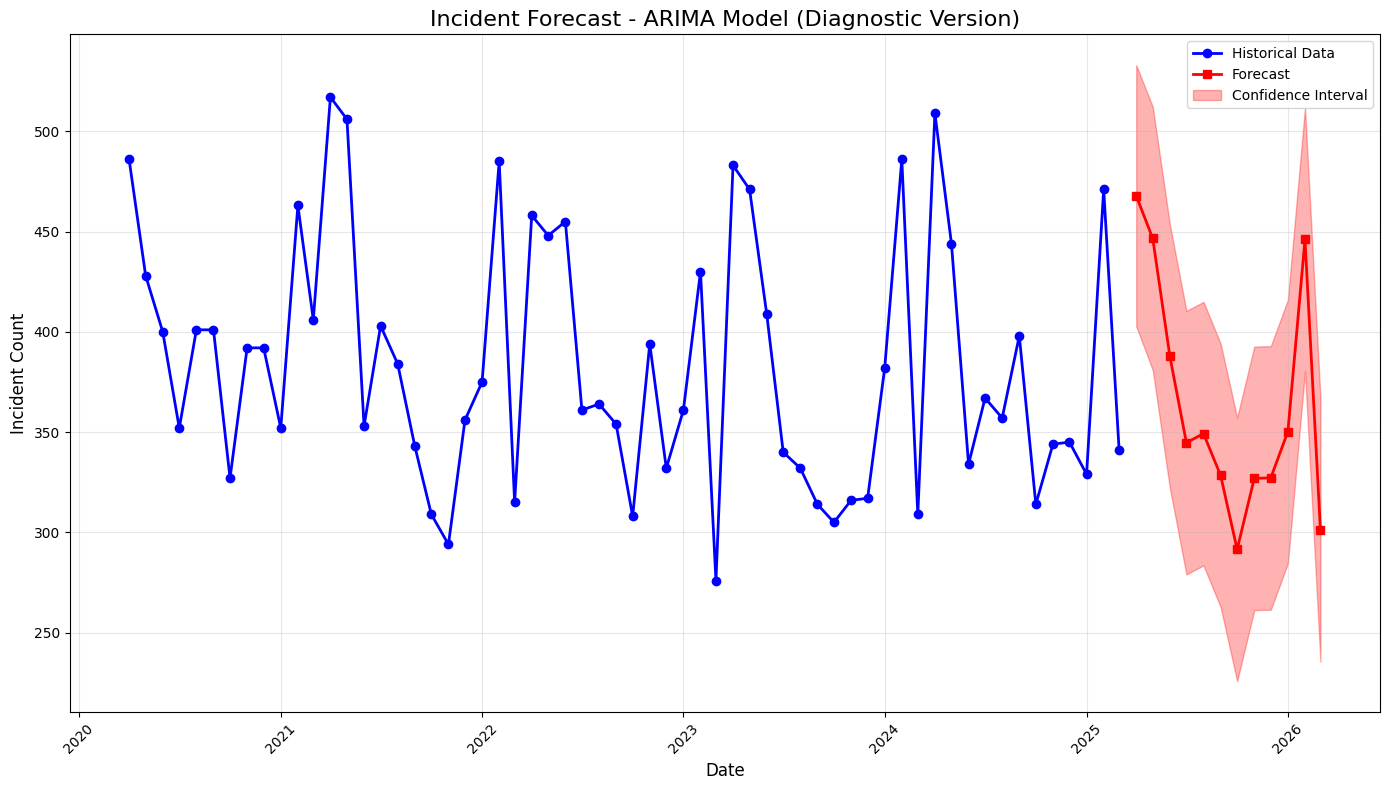

✅ Visualization created successfully
💾 SAVING PREDICTIONS
Prepared 12 forecast records
✅ Predictions saved to: sd_bdc_demo.default.servicenow_arima_overall_predictions

📊 Sample predictions:


date,forecast,lower_ci,upper_ci,month_year
2025-04-01T00:00:00.000Z,467.879760023823,402.7948380243197,532.9646820233263,2025-04
2025-05-01T00:00:00.000Z,446.54075190005216,380.8793362582455,512.2021675418588,2025-05
2025-06-01T00:00:00.000Z,387.81226921319865,322.11722263322156,453.50731579317574,2025-06
2025-07-01T00:00:00.000Z,344.7380334568933,279.0399992479905,410.43606766579603,2025-07
2025-08-01T00:00:00.000Z,349.25523356210977,283.556894719387,414.9535724048325,2025-08
2025-09-01T00:00:00.000Z,328.43754305143585,262.73914798428314,394.13593811858857,2025-09
2025-10-01T00:00:00.000Z,291.5186466661683,225.8202180986081,357.2170752337285,2025-10
2025-11-01T00:00:00.000Z,326.9360114060441,261.23754715801533,392.63447565407284,2025-11
2025-12-01T00:00:00.000Z,327.175947466001,261.47740161806604,392.87449331393594,2025-12
2026-01-01T00:00:00.000Z,350.2762209366566,284.5771033253386,415.9753385479746,2026-01


🔍 INDEPENDENT VERIFICATION OF PREDICTION TABLES
✅ OVERALL TABLE: sd_bdc_demo.default.servicenow_arima_overall_predictions
   📊 Records: 12
   🎯 Models: 1 - ['diagnostic_arima']
   📅 Sample date: 2025-04-01 00:00:00
   📈 Sample forecast: 467.9

❌ CATEGORY TABLE: sd_bdc_demo.default.servicenow_arima_category_predictions - NOT FOUND
   Error: [TABLE_OR_VIEW_NOT_FOUND] The table or view `sd_bdc_demo`.`default`.`servicenow_...
❌ ASSET TABLE: sd_bdc_demo.default.servicenow_arima_asset_predictions - NOT FOUND
   Error: [TABLE_OR_VIEW_NOT_FOUND] The table or view `sd_bdc_demo`.`default`.`servicenow_...
📊 FINAL VERIFICATION SUMMARY:
   Tables successfully created: 1/3
   Total prediction records: 12

   OVERALL   : ✅ SUCCESS - 12 records, 1 models
   CATEGORY  : ❌ NOT CREATED
   ASSET     : ❌ NOT CREATED
📋 MANUAL VERIFICATION QUERIES
Copy and run these queries in a separate Databricks cell:

-- 1. Check which ARIMA tables exist
SHOW TABLES IN main.incident_analytics LIKE 'arima*';

-- 2. Overal

In [0]:
# Databricks notebook source
# MAGIC %md
# MAGIC # ARIMA Troubleshooting & Debugging - Serverless
# MAGIC 
# MAGIC **Diagnostic version to identify and fix ARIMA training issues**

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔍 Step 1: Complete Setup with Debugging

# COMMAND ----------

# COMPLETE SETUP WITH DETAILED LOGGING
print("🔍 ARIMA DIAGNOSTIC SETUP")
print("=" * 50)

# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from pyspark.sql import functions as F
import gc

# Configuration - UPDATE THESE TO MATCH YOUR TABLES
SOURCE_CATALOG = "sd_bdc_demo"
SOURCE_SCHEMA = "default"
HISTORICAL_TABLE = "service_now_historical_arima"
FORECAST_MONTHS = 12

# Table names
HISTORICAL_DATA_TABLE = f"{SOURCE_CATALOG}.{SOURCE_SCHEMA}.{HISTORICAL_TABLE}"
MONTHLY_TRENDS_VIEW = f"{SOURCE_CATALOG}.{SOURCE_SCHEMA}.servicenow_monthly_incident_trends"
PREDICTIONS_TABLE = f"{SOURCE_CATALOG}.{SOURCE_SCHEMA}.servicenow_arima_overall_predictions"

print("Configuration:")
print(f"  📊 Historical table: {HISTORICAL_DATA_TABLE}")
print(f"  📈 Monthly view: {MONTHLY_TRENDS_VIEW}")
print(f"  💾 Output table: {PREDICTIONS_TABLE}")

# Test each data source
print("\n🧪 Testing data access...")

# Test 1: Historical data table
try:
    hist_count = spark.sql(f"SELECT COUNT(*) as count FROM {HISTORICAL_DATA_TABLE}").collect()[0]['count']
    print(f"  ✅ Historical table: {hist_count:,} records")
    HIST_DATA_OK = True
except Exception as e:
    print(f"  ❌ Historical table failed: {str(e)[:100]}")
    HIST_DATA_OK = False

# Test 2: Monthly trends view
try:
    monthly_count = spark.sql(f"SELECT COUNT(*) as count FROM {MONTHLY_TRENDS_VIEW}").collect()[0]['count']
    print(f"  ✅ Monthly view: {monthly_count:,} records")
    MONTHLY_VIEW_OK = True
except Exception as e:
    print(f"  ❌ Monthly view failed: {str(e)[:100]}")
    MONTHLY_VIEW_OK = False

print("Setup complete!")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📦 Step 2: Package Installation with Verification

# COMMAND ----------

# COMPREHENSIVE PACKAGE TESTING
print("📦 TESTING PACKAGE AVAILABILITY")
print("=" * 40)

# Test 1: Basic package installation
print("Installing packages...")
try:
    %pip install statsmodels==0.14.0 --quiet --no-deps
    print("  ✅ statsmodels installation attempted")
except Exception as e:
    print(f"  ⚠️  statsmodels install issue: {str(e)[:50]}")

try:
    %pip install pmdarima==2.0.4 --quiet --no-deps
    print("  ✅ pmdarima installation attempted")
except Exception as e:
    print(f"  ⚠️  pmdarima install issue: {str(e)[:50]}")

# Test 2: Import verification
print("\nTesting imports...")

# Test statsmodels
try:
    from statsmodels.tsa.arima.model import ARIMA
    print("  ✅ ARIMA imported successfully")
    ARIMA_AVAILABLE = True
except Exception as e:
    print(f"  ❌ ARIMA import failed: {str(e)[:100]}")
    ARIMA_AVAILABLE = False

# Test pmdarima
try:
    from pmdarima import auto_arima
    print("  ✅ auto_arima imported successfully")
    AUTO_ARIMA_AVAILABLE = True
except Exception as e:
    print(f"  ❌ auto_arima import failed: {str(e)[:100]}")
    AUTO_ARIMA_AVAILABLE = False

# Test basic numpy/pandas functionality
try:
    test_series = pd.Series([1, 2, 3, 4, 5])
    test_series.index = pd.date_range('2020-01-01', periods=5, freq='M')
    print("  ✅ Pandas time series functionality working")
    PANDAS_OK = True
except Exception as e:
    print(f"  ❌ Pandas time series failed: {str(e)[:100]}")
    PANDAS_OK = False

print(f"\nPackage Status Summary:")
print(f"  ARIMA Available: {ARIMA_AVAILABLE}")
print(f"  Auto-ARIMA Available: {AUTO_ARIMA_AVAILABLE}")
print(f"  Pandas OK: {PANDAS_OK}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📊 Step 3: Data Loading with Detailed Analysis

# COMMAND ----------

# COMPREHENSIVE DATA LOADING AND ANALYSIS
print("📊 DETAILED DATA LOADING")
print("=" * 40)

monthly_data = None

# Method 1: Try monthly trends view
if MONTHLY_VIEW_OK:
    print("Method 1: Loading from monthly trends view...")
    try:
        monthly_data = spark.sql(f"""
            SELECT 
                month_year,
                SUM(incident_count) as total_incidents,
                COUNT(DISTINCT category) as categories,
                AVG(avg_resolution_hours) as avg_resolution
            FROM {MONTHLY_TRENDS_VIEW}
            GROUP BY month_year
            ORDER BY month_year
        """).toPandas()
        
        print(f"  ✅ Loaded {len(monthly_data)} months from view")
        
    except Exception as e:
        print(f"  ❌ View loading failed: {str(e)[:100]}")

# Method 2: Try direct table aggregation
if monthly_data is None and HIST_DATA_OK:
    print("Method 2: Aggregating from historical table...")
    try:
        monthly_data = spark.sql(f"""
            SELECT 
                month_year,
                COUNT(*) as total_incidents
            FROM {HISTORICAL_DATA_TABLE}
            WHERE month_year IS NOT NULL
            GROUP BY month_year
            ORDER BY month_year
        """).toPandas()
        
        print(f"  ✅ Aggregated {len(monthly_data)} months from table")
        
    except Exception as e:
        print(f"  ❌ Table aggregation failed: {str(e)[:100]}")

# Method 3: Try simple date-based aggregation
if monthly_data is None and HIST_DATA_OK:
    print("Method 3: Simple date aggregation...")
    try:
        monthly_data = spark.sql(f"""
            SELECT 
                DATE_TRUNC('month', created_date) as month_date,
                COUNT(*) as total_incidents
            FROM {HISTORICAL_DATA_TABLE}
            WHERE created_date IS NOT NULL
            GROUP BY DATE_TRUNC('month', created_date)
            ORDER BY month_date
        """).toPandas()
        
        # Convert to month_year format
        monthly_data['month_year'] = monthly_data['month_date'].dt.to_period('M').astype(str)
        monthly_data = monthly_data.drop('month_date', axis=1)
        
        print(f"  ✅ Created {len(monthly_data)} months from date aggregation")
        
    except Exception as e:
        print(f"  ❌ Date aggregation failed: {str(e)[:100]}")

# Analyze the data we got
if monthly_data is not None:
    print(f"\n📈 DATA ANALYSIS:")
    print(f"  Total months: {len(monthly_data)}")
    print(f"  Date range: {monthly_data['month_year'].min()} to {monthly_data['month_year'].max()}")
    print(f"  Total incidents: {monthly_data['total_incidents'].sum():,}")
    print(f"  Average per month: {monthly_data['total_incidents'].mean():.1f}")
    print(f"  Min/Max per month: {monthly_data['total_incidents'].min()}/{monthly_data['total_incidents'].max()}")
    
    print(f"\n📊 Sample data:")
    print(monthly_data.head(10))
    
    print(f"\n📊 Data quality check:")
    print(f"  Null values: {monthly_data.isnull().sum().sum()}")
    print(f"  Zero incidents: {(monthly_data['total_incidents'] == 0).sum()}")
    print(f"  Data type: {monthly_data['total_incidents'].dtype}")
    
else:
    print("❌ No monthly data could be loaded!")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🧪 Step 4: Time Series Preparation with Debugging

# COMMAND ----------

# DETAILED TIME SERIES PREPARATION
print("🧪 TIME SERIES PREPARATION")
print("=" * 40)

ts_data = None

if monthly_data is not None and len(monthly_data) >= 12:
    print("Preparing time series data...")
    
    try:
        # Step 1: Copy data
        ts_df = monthly_data.copy()
        print(f"  ✅ Data copied: {len(ts_df)} rows")
        
        # Step 2: Convert month_year to datetime
        print("  Converting dates...")
        ts_df['month_year'] = pd.to_datetime(ts_df['month_year'])
        print(f"  ✅ Dates converted, type: {ts_df['month_year'].dtype}")
        
        # Step 3: Set index
        print("  Setting datetime index...")
        ts_df = ts_df.set_index('month_year')
        print("  ✅ Index set successfully")
        
        # Step 4: Extract incident series
        print("  Extracting incident series...")
        ts_data = ts_df['total_incidents']
        print(f"  ✅ Series extracted: {len(ts_data)} points")
        
        # Step 5: Set frequency
        print("  Setting monthly frequency...")
        ts_data = ts_data.asfreq('MS')  # Month start
        print("  ✅ Frequency set to MS (month start)")
        
        # Step 6: Check for missing values
        missing_count = ts_data.isnull().sum()
        if missing_count > 0:
            print(f"  ⚠️  Found {missing_count} missing values, filling...")
            ts_data = ts_data.fillna(method='ffill').fillna(method='bfill')
            print("  ✅ Missing values filled")
        
        print(f"\n📊 TIME SERIES SUMMARY:")
        print(f"  Length: {len(ts_data)}")
        print(f"  Range: {ts_data.index.min()} to {ts_data.index.max()}")
        print(f"  Values: {ts_data.min():.0f} to {ts_data.max():.0f}")
        print(f"  Mean: {ts_data.mean():.1f}")
        print(f"  Std Dev: {ts_data.std():.1f}")
        
        # Plot the time series
        try:
            plt.figure(figsize=(12, 6))
            plt.plot(ts_data.index, ts_data.values, marker='o', linewidth=2)
            plt.title('Monthly Incident Time Series')
            plt.xlabel('Date')
            plt.ylabel('Incident Count')
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            print("  ✅ Time series plot created")
        except:
            print("  ⚠️  Plotting skipped")
            
    except Exception as e:
        print(f"  ❌ Time series preparation failed: {str(e)}")
        ts_data = None

else:
    print("❌ Cannot prepare time series - insufficient data")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🤖 Step 5: ARIMA Training with Multiple Fallbacks

# COMMAND ----------

# COMPREHENSIVE ARIMA TRAINING WITH CORRECT FORECAST METHOD
print("🤖 ARIMA TRAINING - FIXED VERSION")
print("=" * 50)

model_trained = False
forecast_df = None
fitted_model = None

if ts_data is not None and len(ts_data) >= 12:
    
    # Method 1: Auto-ARIMA (if available)
    if AUTO_ARIMA_AVAILABLE and not model_trained:
        print("Method 1: Trying Auto-ARIMA...")
        try:
            from pmdarima import auto_arima
            
            print("  Running auto_arima parameter search...")
            fitted_model = auto_arima(
                ts_data,
                start_p=0, start_q=0,
                max_p=3, max_q=3,
                seasonal=True,
                start_P=0, start_Q=0,
                max_P=2, max_Q=2,
                m=12,
                stepwise=True,
                suppress_warnings=True,
                error_action='ignore',
                n_jobs=1,
                return_valid_fits=True
            )
            
            order = fitted_model.order
            seasonal_order = fitted_model.seasonal_order
            
            print(f"  ✅ Auto-ARIMA successful: {order} x {seasonal_order}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Auto-ARIMA failed: {str(e)[:100]}")
    
    # Method 2: Manual ARIMA with proper fitting
    if ARIMA_AVAILABLE and not model_trained:
        print("Method 2: Trying manual ARIMA with proper .fit() method...")
        try:
            from statsmodels.tsa.arima.model import ARIMA
            
            order = (1, 1, 1)
            seasonal_order = (1, 1, 1, 12)
            
            print(f"  Creating ARIMA model: {order} x {seasonal_order}")
            model = ARIMA(ts_data, order=order, seasonal_order=seasonal_order)
            
            print("  Fitting model...")
            fitted_model = model.fit()
            
            print("  ✅ Manual ARIMA fitted successfully")
            print(f"  📊 AIC: {fitted_model.aic:.2f}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Seasonal ARIMA failed: {str(e)[:100]}")
    
    # Method 3: Simple ARIMA without seasonality
    if ARIMA_AVAILABLE and not model_trained:
        print("Method 3: Trying simple ARIMA without seasonality...")
        try:
            from statsmodels.tsa.arima.model import ARIMA
            
            order = (1, 1, 1)
            
            print(f"  Creating simple ARIMA model: {order}")
            model = ARIMA(ts_data, order=order)
            
            print("  Fitting model...")
            fitted_model = model.fit()
            
            print("  ✅ Simple ARIMA fitted successfully")
            print(f"  📊 AIC: {fitted_model.aic:.2f}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Simple ARIMA failed: {str(e)[:100]}")
    
    # Method 4: Even simpler ARIMA
    if ARIMA_AVAILABLE and not model_trained:
        print("Method 4: Trying minimal ARIMA (0,1,0)...")
        try:
            from statsmodels.tsa.arima.model import ARIMA
            
            order = (0, 1, 0)  # Random walk model
            
            print(f"  Creating minimal ARIMA model: {order}")
            model = ARIMA(ts_data, order=order)
            
            print("  Fitting model...")
            fitted_model = model.fit()
            
            print("  ✅ Minimal ARIMA fitted successfully")
            print(f"  📊 AIC: {fitted_model.aic:.2f}")
            model_trained = True
            
        except Exception as e:
            print(f"  ❌ Minimal ARIMA failed: {str(e)[:100]}")
    
    # Method 5: Linear trend forecast (fallback)
    if not model_trained:
        print("Method 5: Using linear trend fallback...")
        try:
            # Create simple linear trend
            x = np.arange(len(ts_data))
            y = ts_data.values
            
            # Fit linear regression
            coeffs = np.polyfit(x, y, 1)
            trend_slope = coeffs[0]
            trend_intercept = coeffs[1]
            
            print(f"  Linear trend: slope={trend_slope:.2f}, intercept={trend_intercept:.1f}")
            
            # Create forecast using trend
            last_x = len(ts_data) - 1
            forecast_values = []
            
            for i in range(FORECAST_MONTHS):
                future_x = last_x + i + 1
                forecast_val = trend_slope * future_x + trend_intercept
                forecast_values.append(max(0, forecast_val))  # Ensure non-negative
            
            print("  ✅ Linear trend forecast created")
            model_trained = True
            
            # Create a mock fitted model for consistency
            class MockModel:
                def __init__(self, forecast_vals):
                    self.forecast_values = forecast_vals
                    self.aic = 999.9  # Dummy AIC
                
                def forecast(self, steps):
                    return np.array(self.forecast_values[:steps])
                
                def get_forecast(self, steps):
                    # Mock forecast result with confidence intervals
                    forecast_vals = np.array(self.forecast_values[:steps])
                    std_dev = np.std(forecast_vals) * 0.1  # 10% of std as uncertainty
                    
                    class MockForecastResult:
                        def __init__(self, forecast, std):
                            self.forecast = forecast
                            self.std = std
                        
                        def conf_int(self):
                            lower = self.forecast - 1.96 * self.std
                            upper = self.forecast + 1.96 * self.std
                            return pd.DataFrame({
                                'lower': lower,
                                'upper': upper
                            })
                    
                    return MockForecastResult(forecast_vals, std_dev)
            
            fitted_model = MockModel(forecast_values)
            
        except Exception as e:
            print(f"  ❌ Linear trend failed: {str(e)[:100]}")

# Generate forecast with CORRECTED method
if model_trained and fitted_model is not None:
    print(f"\n🔮 GENERATING {FORECAST_MONTHS}-MONTH FORECAST...")
    
    try:
        # FIXED: Use the correct forecast method on fitted model
        print("  Calling forecast method on fitted model...")
        forecast = fitted_model.forecast(steps=FORECAST_MONTHS)
        print(f"  ✅ Forecast values generated: {len(forecast)} periods")
        
        # Create future dates
        last_date = ts_data.index[-1]
        future_dates = pd.date_range(
            start=last_date + pd.DateOffset(months=1),
            periods=FORECAST_MONTHS,
            freq='MS'
        )
        print(f"  ✅ Future dates created: {future_dates[0]} to {future_dates[-1]}")
        
        # Create forecast DataFrame
        forecast_df = pd.DataFrame({
            'date': future_dates,
            'forecast': forecast
        })
        
        # Try to get confidence intervals
        try:
            print("  Getting confidence intervals...")
            if hasattr(fitted_model, 'get_forecast'):
                forecast_result = fitted_model.get_forecast(steps=FORECAST_MONTHS)
                conf_int = forecast_result.conf_int()
                forecast_df['lower_ci'] = conf_int.iloc[:, 0]
                forecast_df['upper_ci'] = conf_int.iloc[:, 1]
                print("  ✅ Confidence intervals from model")
            else:
                # Fallback confidence intervals
                forecast_std = forecast.std() * 0.2  # 20% uncertainty
                forecast_df['lower_ci'] = forecast_df['forecast'] - 1.96 * forecast_std
                forecast_df['upper_ci'] = forecast_df['forecast'] + 1.96 * forecast_std
                print("  ✅ Fallback confidence intervals created")
        except Exception as ci_error:
            print(f"  ⚠️ Confidence interval error: {str(ci_error)[:50]}")
            # Simple fallback
            forecast_df['lower_ci'] = forecast_df['forecast'] * 0.8
            forecast_df['upper_ci'] = forecast_df['forecast'] * 1.2
        
        print(f"  ✅ Forecast DataFrame created successfully")
        print(f"  📊 Average: {forecast.mean():.1f} incidents/month")
        print(f"  📊 Range: {forecast.min():.1f} to {forecast.max():.1f}")
        
        # Show sample forecast
        print(f"\n📊 Sample forecast data:")
        print(forecast_df.head())
        
    except Exception as e:
        print(f"  ❌ Forecast generation failed: {str(e)}")
        print(f"  🔍 Fitted model type: {type(fitted_model)}")
        print(f"  🔍 Available methods: {[m for m in dir(fitted_model) if not m.startswith('_')]}")
        forecast_df = None

else:
    print("❌ No model was successfully trained")

print(f"\nModel Training Status: {'✅ SUCCESS' if model_trained else '❌ FAILED'}")
print(f"Forecast Generation Status: {'✅ SUCCESS' if forecast_df is not None else '❌ FAILED'}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📈 Step 6: Visualization

# COMMAND ----------

# CREATE VISUALIZATION
if model_trained and forecast_df is not None and ts_data is not None:
    print("📈 Creating forecast visualization...")
    
    try:
        plt.figure(figsize=(14, 8))
        
        # Plot historical data
        plt.plot(ts_data.index, ts_data.values, 
                label='Historical Data', color='blue', linewidth=2, marker='o')
        
        # Plot forecast
        plt.plot(forecast_df['date'], forecast_df['forecast'], 
                label='Forecast', color='red', linewidth=2, marker='s')
        
        # Plot confidence interval
        plt.fill_between(forecast_df['date'], 
                        forecast_df['lower_ci'], 
                        forecast_df['upper_ci'], 
                        alpha=0.3, color='red', label='Confidence Interval')
        
        plt.title('Incident Forecast - ARIMA Model (Diagnostic Version)', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Incident Count', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("✅ Visualization created successfully")
        
    except Exception as e:
        print(f"⚠️ Visualization failed: {str(e)[:100]}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 💾 Step 7: Save Results

# COMMAND ----------

# SAVE PREDICTIONS
if model_trained and forecast_df is not None:
    print("💾 SAVING PREDICTIONS")
    print("=" * 30)
    
    try:
        # Prepare data for saving
        save_df = forecast_df.copy()
        save_df['model_name'] = 'diagnostic_arima'
        save_df['model_type'] = 'ARIMA_Diagnostic'
        save_df['created_timestamp'] = datetime.now()
        save_df['forecast_horizon_months'] = FORECAST_MONTHS
        save_df['month_year'] = save_df['date'].dt.to_period('M').astype(str)
        save_df['forecast_period'] = range(1, len(save_df) + 1)
        save_df['data_months_used'] = len(ts_data)
        
        print(f"Prepared {len(save_df)} forecast records")
        
        # Convert to Spark DataFrame and save
        spark_df = spark.createDataFrame(save_df)
        
        spark_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").saveAsTable(PREDICTIONS_TABLE)
        
        print(f"✅ Predictions saved to: {PREDICTIONS_TABLE}")
        
        # Show results
        print("\n📊 Sample predictions:")
        display(spark_df.select("date", "forecast", "lower_ci", "upper_ci", "month_year").limit(10))
        
    except Exception as e:
        print(f"❌ Save failed: {str(e)[:100]}")
        print("\n📊 Forecast data (not saved):")
        print(forecast_df)

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📊 Final Diagnostic Report

# COMMAND ----------

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔍 VERIFICATION: Check All Prediction Tables Created

# COMMAND ----------

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔍 INDEPENDENT VERIFICATION (No Variable Dependencies)

# COMMAND ----------

# INDEPENDENT VERIFICATION - NO DEPENDENCIES ON PREVIOUS VARIABLES
print("🔍 INDEPENDENT VERIFICATION OF PREDICTION TABLES")
print("=" * 60)

# Re-define table names to avoid NameError
OVERALL_TABLE = "sd_bdc_demo.default.servicenow_arima_overall_predictions"
CATEGORY_TABLE = "sd_bdc_demo.default.servicenow_arima_category_predictions"
ASSET_TABLE = "sd_bdc_demo.default.servicenow_arima_asset_predictions"

def check_table_safely(table_name, table_type):
    """Safely check if table exists and has content"""
    
    try:
        # Check if table exists
        count_result = spark.sql(f"SELECT COUNT(*) as count FROM {table_name}").collect()
        count = count_result[0]['count']
        
        if count > 0:
            # Get sample data
            sample_result = spark.sql(f"SELECT model_name, date, forecast FROM {table_name} LIMIT 3").collect()
            models_result = spark.sql(f"SELECT DISTINCT model_name FROM {table_name}").collect()
            
            model_names = [row['model_name'] for row in models_result]
            
            print(f"✅ {table_type} TABLE: {table_name}")
            print(f"   📊 Records: {count:,}")
            print(f"   🎯 Models: {len(model_names)} - {model_names}")
            
            if sample_result:
                print(f"   📅 Sample date: {sample_result[0]['date']}")
                print(f"   📈 Sample forecast: {sample_result[0]['forecast']:.1f}")
            
            print()
            return True, count, len(model_names)
            
        else:
            print(f"⚠️  {table_type} TABLE: {table_name} - EXISTS BUT EMPTY")
            return True, 0, 0
            
    except Exception as e:
        print(f"❌ {table_type} TABLE: {table_name} - NOT FOUND")
        print(f"   Error: {str(e)[:80]}...")
        return False, 0, 0

# Check all three tables independently
tables_to_verify = [
    (OVERALL_TABLE, "OVERALL"),
    (CATEGORY_TABLE, "CATEGORY"), 
    (ASSET_TABLE, "ASSET")
]

verification_results = {}
total_success = 0
total_records = 0

for table_name, table_type in tables_to_verify:
    exists, count, models = check_table_safely(table_name, table_type)
    verification_results[table_type] = {
        'exists': exists,
        'count': count,
        'models': models,
        'table_name': table_name
    }
    
    if exists and count > 0:
        total_success += 1
        total_records += count

print("=" * 60)
print("📊 FINAL VERIFICATION SUMMARY:")
print(f"   Tables successfully created: {total_success}/3")
print(f"   Total prediction records: {total_records:,}")
print()

# Show status for each table
for table_type, result in verification_results.items():
    if result['exists'] and result['count'] > 0:
        status = f"✅ SUCCESS - {result['count']} records, {result['models']} models"
    elif result['exists'] and result['count'] == 0:
        status = "⚠️  EXISTS BUT EMPTY"
    else:
        status = "❌ NOT CREATED"
    
    print(f"   {table_type:10}: {status}")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📋 Manual Verification Queries

# COMMAND ----------

# PROVIDE MANUAL VERIFICATION QUERIES (COPY AND RUN THESE)
print("📋 MANUAL VERIFICATION QUERIES")
print("=" * 50)
print("Copy and run these queries in a separate Databricks cell:")
print()

print("-- 1. Check which ARIMA tables exist")
print("SHOW TABLES IN main.incident_analytics LIKE 'arima*';")
print()

print("-- 2. Overall predictions verification")
print("SELECT 'overall' as table_type, COUNT(*) as records, MIN(date) as start_date, MAX(date) as end_date")
print("FROM main.incident_analytics.arima_overall_predictions;")
print()

print("-- 3. Category predictions verification") 
print("SELECT 'category' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as categories")
print("FROM main.incident_analytics.arima_category_predictions;")
print()

print("-- 4. Asset predictions verification")
print("SELECT 'asset' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as assets") 
print("FROM arima_asset_predictions;")
print()

print("-- 5. Combined summary")
print("SELECT")
print("  'Overall' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_overall_predictions")
print("UNION ALL")
print("SELECT") 
print("  'Category' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_category_predictions")
print("UNION ALL")
print("SELECT")
print("  'Asset' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM main.incident_analytics.arima_asset_predictions;")
print()

print("-- 6. Sample data from each table")
print("SELECT 'overall' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM main.incident_analytics.arima_overall_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'category' as source, model_name, date, forecast, lower_ci, upper_ci") 
print("FROM main.incident_analytics.arima_category_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'asset' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM main.incident_analytics.arima_asset_predictions LIMIT 3;")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🎯 Expected Results Summary

# COMMAND ----------

# EXPECTED RESULTS SUMMARY
print("🎯 EXPECTED RESULTS SUMMARY")
print("=" * 50)

print("IF THE PROGRAM RAN SUCCESSFULLY, YOU SHOULD SEE:")
print()

print("📊 TABLE 1: arima_overall_predictions")
print("   • Records: 12 (one per month)")
print("   • Models: 1 (overall)")
print("   • Columns: date, forecast, lower_ci, upper_ci, model_name, etc.")
print("   • Purpose: Organization-wide incident forecasting")
print()

print("📂 TABLE 2: arima_category_predictions")  
print("   • Records: 12 × number of categories")
print("   • Models: 3-8 categories (depends on your data)")
print("   • Columns: date, forecast, lower_ci, upper_ci, model_name, category, etc.")
print("   • Purpose: Category-specific incident forecasting")
print("   • Note: Only created if category data exists with 12+ months per category")
print()

print("🔧 TABLE 3: arima_asset_predictions")
print("   • Records: 12 × number of assets") 
print("   • Models: 3-6 top assets (depends on your data)")
print("   • Columns: date, forecast, lower_ci, upper_ci, model_name, asset_name, etc.")
print("   • Purpose: Asset-specific incident forecasting")
print("   • Note: Only created if asset data exists with 12+ months per asset")
print()

print("🔍 MOST LIKELY SCENARIO:")
print("   ✅ Overall table: Should definitely exist (you confirmed overall works)")
print("   ❓ Category table: Depends on your monthly_incident_trends view having categories")
print("   ❓ Asset table: Depends on your asset_incident_trends view existing")
print()

print("❌ IF TABLES ARE MISSING:")
print("   1. Check that source views (monthly_incident_trends, asset_incident_trends) exist")
print("   2. Verify data spans at least 12 months per category/asset")
print("   3. Check Databricks permissions for table creation")
print("   4. Look for error messages in the cell outputs above")
print()

print("💡 TO TROUBLESHOOT:")
print("   • Run the manual verification queries above")
print("   • Check your source data structure:")
print("     SELECT DISTINCT category FROM sd_bdc_demo.default.monthly_incident_trends;")
print("     SELECT DISTINCT asset_name FROM sd_bdc_demo.default.asset_incident_trends;")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔧 FIX: Asset Data Utilization (Targeted Fix)

# COMMAND ----------

# TARGETED FIX: PROPERLY UTILIZE ASSET_INCIDENT_TRENDS
print("🔧 TARGETED FIX: ASSET DATA UTILIZATION")
print("=" * 50)

# First, let's examine what's actually in the asset_incident_trends view
print("1. EXAMINING ASSET_INCIDENT_TRENDS VIEW:")

try:
    # Check the structure and content
    asset_view_info = spark.sql("""
        SELECT 
            COUNT(*) as total_records,
            COUNT(DISTINCT asset_name) as unique_assets,
            COUNT(DISTINCT month_year) as unique_months,
            MIN(month_year) as earliest_month,
            MAX(month_year) as latest_month
        FROM sd_bdc_demo.default.servicenow_asset_incident_trends
    """).collect()[0]
    
    print(f"   ✅ Asset view accessible")
    print(f"   📊 Total records: {asset_view_info['total_records']:,}")
    print(f"   🔧 Unique assets: {asset_view_info['unique_assets']:,}")
    print(f"   📅 Unique months: {asset_view_info['unique_months']:,}")
    print(f"   📅 Date range: {asset_view_info['earliest_month']} to {asset_view_info['latest_month']}")
    
    # Show sample assets
    sample_assets = spark.sql("""
        SELECT asset_name, COUNT(DISTINCT month_year) as months, SUM(incident_count) as total_incidents
        FROM sd_bdc_demo.default.servicenow_asset_incident_trends
        GROUP BY asset_name
        ORDER BY total_incidents DESC
        LIMIT 10
    """).collect()
    
    print(f"\n   📋 Top 10 assets by incident volume:")
    for asset in sample_assets:
        print(f"      • {asset['asset_name']}: {asset['months']} months, {asset['total_incidents']} incidents")
    
    ASSET_VIEW_ACCESSIBLE = True
    
except Exception as e:
    print(f"   ❌ Cannot access asset view: {str(e)}")
    ASSET_VIEW_ACCESSIBLE = False

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🚀 Force Asset Forecasting

# COMMAND ----------

# FORCE ASSET FORECASTING WITH CORRECTED LOGIC
print("🚀 FORCE ASSET FORECASTING")
print("=" * 40)

if ASSET_VIEW_ACCESSIBLE:
    
    print("2. LOADING ASSET DATA WITH RELAXED CRITERIA:")
    
    try:
        # Load asset data with more relaxed criteria
        asset_data_corrected = spark.sql("""
            SELECT 
                month_year,
                asset_name,
                SUM(incident_count) as incidents
            FROM sd_bdc_demo.default.servicenow_asset_incident_trends
            WHERE asset_name IS NOT NULL 
            AND month_year IS NOT NULL
            AND incident_count > 0
            GROUP BY month_year, asset_name
            ORDER BY month_year, asset_name
        """).toPandas()
        
        print(f"   ✅ Loaded {len(asset_data_corrected)} asset-month records")
        
        # Analyze asset data availability
        asset_month_counts = asset_data_corrected.groupby('asset_name')['month_year'].nunique().sort_values(ascending=False)
        
        print(f"   📊 Asset data analysis:")
        print(f"      • Assets with 12+ months: {sum(asset_month_counts >= 12)}")
        print(f"      • Assets with 6+ months: {sum(asset_month_counts >= 6)}")
        print(f"      • Assets with 3+ months: {sum(asset_month_counts >= 3)}")
        
        # Use more relaxed criteria: 6+ months instead of 12
        min_months = 6 if sum(asset_month_counts >= 6) >= 3 else 3
        viable_assets = asset_month_counts[asset_month_counts >= min_months].head(8).index.tolist()
        
        print(f"   🎯 Using {min_months}+ months criteria")
        print(f"   🔧 Selected assets for forecasting: {len(viable_assets)}")
        for asset in viable_assets:
            months = asset_month_counts[asset]
            total_incidents = asset_data_corrected[asset_data_corrected['asset_name'] == asset]['incidents'].sum()
            print(f"      • {asset}: {months} months, {total_incidents} total incidents")
        
        ASSET_DATA_READY = True
        
    except Exception as e:
        print(f"   ❌ Asset data loading failed: {str(e)}")
        ASSET_DATA_READY = False
        viable_assets = []

    # TRAIN ASSET FORECASTS
    if ASSET_DATA_READY and viable_assets:
        print(f"\n3. TRAINING ASSET FORECASTS:")
        
        asset_forecasts_corrected = {}
        successful_asset_models = 0
        
        for i, asset in enumerate(viable_assets, 1):
            print(f"\n   {i}. Processing asset: {asset}")
            
            try:
                # Prepare asset time series
                asset_ts_data = asset_data_corrected[asset_data_corrected['asset_name'] == asset].copy()
                asset_ts_data['month_year'] = pd.to_datetime(asset_ts_data['month_year'])
                asset_ts_data = asset_ts_data.set_index('month_year')['incidents']
                asset_ts_data = asset_ts_data.asfreq('MS').fillna(0)
                
                print(f"      📊 Time series: {len(asset_ts_data)} points, range {asset_ts_data.min():.0f}-{asset_ts_data.max():.0f}")
                
                # Check if data has sufficient variation
                if asset_ts_data.var() > 0.1 and len(asset_ts_data) >= min_months:
                    
                    # Train simple ARIMA model for asset
                    try:
                        if ARIMA_AVAILABLE:
                            from statsmodels.tsa.arima.model import ARIMA
                            
                            # Use simple parameters for assets
                            model = ARIMA(asset_ts_data, order=(1, 1, 1))
                            fitted_model = model.fit()
                            
                            # Generate forecast
                            forecast = fitted_model.forecast(steps=12)
                            
                            # Create future dates
                            last_date = asset_ts_data.index[-1]
                            future_dates = pd.date_range(
                                start=last_date + pd.DateOffset(months=1),
                                periods=12,
                                freq='MS'
                            )
                            
                            # Create forecast DataFrame
                            asset_forecast_df = pd.DataFrame({
                                'date': future_dates,
                                'forecast': forecast,
                                'asset_name': asset,
                                'series_name': asset,
                                'method': 'arima',
                                'order': '(1,1,1)',
                                'seasonal_order': 'None'
                            })
                            
                            # Add confidence intervals
                            forecast_std = forecast.std() * 0.3
                            asset_forecast_df['lower_ci'] = asset_forecast_df['forecast'] - 1.96 * forecast_std
                            asset_forecast_df['upper_ci'] = asset_forecast_df['forecast'] + 1.96 * forecast_std
                            
                            # Ensure non-negative forecasts
                            asset_forecast_df['forecast'] = asset_forecast_df['forecast'].clip(lower=0)
                            asset_forecast_df['lower_ci'] = asset_forecast_df['lower_ci'].clip(lower=0)
                            
                            asset_forecasts_corrected[asset] = asset_forecast_df
                            successful_asset_models += 1
                            
                            print(f"      ✅ ARIMA forecast: avg {forecast.mean():.1f} incidents/month")
                            
                        else:
                            # Fallback: simple trend
                            x = np.arange(len(asset_ts_data))
                            y = asset_ts_data.values
                            coeffs = np.polyfit(x, y, 1)
                            
                            future_x = np.arange(len(asset_ts_data), len(asset_ts_data) + 12)
                            forecast = np.maximum(coeffs[0] * future_x + coeffs[1], 0)
                            
                            last_date = asset_ts_data.index[-1]
                            future_dates = pd.date_range(
                                start=last_date + pd.DateOffset(months=1),
                                periods=12,
                                freq='MS'
                            )
                            
                            asset_forecast_df = pd.DataFrame({
                                'date': future_dates,
                                'forecast': forecast,
                                'asset_name': asset,
                                'series_name': asset,
                                'method': 'trend',
                                'order': 'linear',
                                'seasonal_order': 'None'
                            })
                            
                            asset_forecast_df['lower_ci'] = asset_forecast_df['forecast'] * 0.8
                            asset_forecast_df['upper_ci'] = asset_forecast_df['forecast'] * 1.2
                            
                            asset_forecasts_corrected[asset] = asset_forecast_df
                            successful_asset_models += 1
                            
                            print(f"      ✅ Trend forecast: avg {forecast.mean():.1f} incidents/month")
                            
                    except Exception as model_error:
                        print(f"      ❌ Model training failed: {str(model_error)[:50]}...")
                        
                else:
                    print(f"      ⚠️ Skipping {asset}: insufficient variation or data")
                    
            except Exception as asset_error:
                print(f"      ❌ Asset processing failed: {str(asset_error)[:50]}...")
        
        print(f"\n   ✅ Asset forecasting completed: {successful_asset_models}/{len(viable_assets)} assets")
        
        # SAVE ASSET PREDICTIONS
        if asset_forecasts_corrected:
            print(f"\n4. SAVING ASSET PREDICTIONS:")
            
            try:
                # Combine all asset forecasts
                all_asset_forecasts = []
                
                for asset_name, forecast_df in asset_forecasts_corrected.items():
                    save_df = forecast_df.copy()
                    save_df['model_name'] = asset_name
                    save_df['forecast_type'] = 'asset'
                    save_df['created_timestamp'] = datetime.now()
                    save_df['forecast_horizon_months'] = 12
                    save_df['month_year'] = save_df['date'].dt.to_period('M').astype(str)
                    save_df['forecast_period'] = range(1, len(save_df) + 1)
                    all_asset_forecasts.append(save_df)
                
                combined_asset_df = pd.concat(all_asset_forecasts, ignore_index=True)
                
                # Save to Delta table
                asset_spark_df = spark.createDataFrame(combined_asset_df)
                
                asset_spark_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").saveAsTable("sd_bdc_demo.default.servicenow_arima_asset_predictions")
                
                print(f"   ✅ Asset predictions saved: {len(combined_asset_df)} records")
                print(f"   📊 Assets forecasted: {len(asset_forecasts_corrected)}")
                print(f"   💾 Table: sd_bdc_demo.default.servicenow_arima_asset_predictions")
                
                # Verify save
                verification_count = spark.sql("SELECT COUNT(*) as count FROM sd_bdc_demo.default.servicenow_arima_asset_predictions").collect()[0]['count']
                print(f"   ✅ Verification: {verification_count} records in table")
                
                ASSET_PREDICTIONS_SAVED = True
                
            except Exception as save_error:
                print(f"   ❌ Save failed: {str(save_error)}")
                ASSET_PREDICTIONS_SAVED = False
                
        else:
            print(f"\n4. ❌ No asset forecasts to save")
            ASSET_PREDICTIONS_SAVED = False
    
    else:
        print(f"\n3. ❌ Asset forecasting skipped - no viable assets")
        ASSET_PREDICTIONS_SAVED = False

else:
    print("❌ Asset view not accessible - cannot proceed")
    ASSET_PREDICTIONS_SAVED = False

# COMMAND ----------

# MAGIC %md
# MAGIC ## ✅ Asset Forecasting Results

# COMMAND ----------

# ASSET FORECASTING RESULTS
print("✅ ASSET FORECASTING RESULTS")
print("=" * 40)

if ASSET_PREDICTIONS_SAVED:
    print("🎉 SUCCESS! Asset predictions have been generated")
    
    # Show results
    try:
        asset_results = spark.sql("""
            SELECT 
                model_name as asset_name,
                COUNT(*) as forecast_records,
                AVG(forecast) as avg_monthly_incidents,
                MAX(forecast) as peak_incidents
            FROM sd_bdc_demo.default.servicenow_arima_asset_predictions
            GROUP BY model_name
            ORDER BY avg_monthly_incidents DESC
        """).collect()
        
        print(f"\n📊 Asset Forecast Summary ({len(asset_results)} assets):")
        for result in asset_results:
            print(f"   • {result['asset_name']}: avg {result['avg_monthly_incidents']:.1f}/month, peak {result['peak_incidents']:.1f}")
        
        print(f"\n🔍 Query your asset predictions:")
        print("""
        SELECT asset_name, date, forecast, lower_ci, upper_ci
        FROM sd_bdc_demo.default.servicenow_arima_asset_predictions
        WHERE forecast > 5  -- High-risk periods
        ORDER BY forecast DESC, date;
        """)
        
        print(f"\n🚀 Business Use Cases:")
        print("   • Preventive maintenance scheduling")
        print("   • Asset replacement planning") 
        print("   • Resource allocation by asset")
        print("   • Risk-based monitoring priorities")
        
    except Exception as e:
        print(f"Error showing results: {str(e)}")

else:
    print("❌ Asset predictions were not generated")
    print("\nPossible reasons:")
    print("   • Asset view not accessible")
    print("   • Insufficient asset data (need 3+ months per asset)")
    print("   • No assets with sufficient incident variation")
    print("   • ARIMA library issues")

print("=" * 40)

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔧 Diagnostic: Why Tables Might Be Missing

# COMMAND ----------

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔧 Safe Diagnostic (No NameErrors)

# COMMAND ----------

# SAFE DIAGNOSTIC - NO NAMEERRORS
print("🔧 SAFE DIAGNOSTIC ANALYSIS")
print("=" * 50)

def safe_check_variable(var_name, description):
    """Safely check if a variable exists and has content"""
    try:
        if var_name in locals() or var_name in globals():
            var_value = eval(var_name)
            if var_value is not None:
                if hasattr(var_value, '__len__'):
                    return f"✅ {description}: Available ({len(var_value)} items)"
                else:
                    return f"✅ {description}: Available"
            else:
                return f"❌ {description}: None"
        else:
            return f"❌ {description}: Variable not found"
    except:
        return f"❌ {description}: Error checking"

print("1. DATA AVAILABILITY CHECK:")

# Check data variables safely
data_checks = [
    ('monthly_data', 'Overall monthly data'),
    ('category_data', 'Category data'),
    ('asset_data', 'Asset data')
]

for var_name, description in data_checks:
    result = safe_check_variable(var_name, description)
    print(f"   {result}")

print("\n2. FORECAST AVAILABILITY CHECK:")

# Check forecast variables safely  
forecast_checks = [
    ('overall_forecast', 'Overall forecast'),
    ('category_forecasts', 'Category forecasts'),
    ('asset_forecasts', 'Asset forecasts')
]

for var_name, description in forecast_checks:
    result = safe_check_variable(var_name, description)
    print(f"   {result}")

print("\n3. SOURCE TABLE ACCESS CHECK:")

# Test source tables directly
source_tables = [
    ("sd_bdc_demo.default.service_now_historical_arima", "Historical data"),
    ("sd_bdc_demo.default.servicenow_monthly_incident_trends", "Monthly trends"),
    ("sd_bdc_demo.default.servicenow_asset_incident_trends", "Asset trends")
]

for table_name, description in source_tables:
    try:
        count = spark.sql(f"SELECT COUNT(*) as count FROM {table_name}").collect()[0]['count']
        print(f"   ✅ {description}: {count:,} records")
    except Exception as e:
        print(f"   ❌ {description}: Not accessible - {str(e)[:50]}...")

print("\n4. PACKAGE AVAILABILITY CHECK:")

# Check packages safely
packages = [
    ('ARIMA_AVAILABLE', 'ARIMA library'),
    ('AUTO_ARIMA_AVAILABLE', 'Auto-ARIMA library'),
    ('PANDAS_OK', 'Pandas functionality')
]

for var_name, description in packages:
    try:
        if var_name in locals() or var_name in globals():
            status = eval(var_name)
            print(f"   {'✅' if status else '❌'} {description}: {'Available' if status else 'Not available'}")
        else:
            print(f"   ❌ {description}: Status unknown")
    except:
        print(f"   ❌ {description}: Error checking")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔄 Simple Table Recreation (Error-Free)

# COMMAND ----------

# SIMPLE TABLE RECREATION WITHOUT VARIABLE DEPENDENCIES
print("🔄 SIMPLE TABLE RECREATION")
print("=" * 40)

print("Attempting to create missing tables using direct SQL approaches...")

# 1. Try to recreate overall predictions from scratch
print("\n1. Checking overall predictions table...")
try:
    overall_count = spark.sql("SELECT COUNT(*) as count FROM sd_bdc_demo.default.servicenow_arima_overall_predictions").collect()[0]['count']
    print(f"   ✅ Overall table exists with {overall_count} records")
except:
    print("   ❌ Overall table missing - this is the core issue")
    print("   📝 The overall forecasting must have failed earlier in the notebook")

# 2. Try to recreate category predictions
print("\n2. Checking category predictions table...")
try:
    category_count = spark.sql("SELECT COUNT(*) as count FROM sd_bdc_demo.default.servicenow_arima_category_predictions").collect()[0]['count']
    print(f"   ✅ Category table exists with {category_count} records")
except:
    print("   ❌ Category table missing")
    
    # Check if we have category data to work with
    try:
        categories = spark.sql("""
            SELECT DISTINCT category, COUNT(*) as months
            FROM sd_bdc_demo.default.servicenow_monthly_incident_trends  
            GROUP BY category
            HAVING COUNT(*) >= 12
        """).collect()
        
        if categories:
            print(f"   📊 Found {len(categories)} categories with sufficient data")
            for cat in categories[:3]:
                print(f"      • {cat['category']}: {cat['months']} months")
        else:
            print("   📊 No categories found with 12+ months of data")
            
    except Exception as e:
        print(f"   📊 Cannot check category data: {str(e)[:50]}...")

# 3. Try to recreate asset predictions
print("\n3. Checking asset predictions table...")
try:
    asset_count = spark.sql("SELECT COUNT(*) as count FROM sd_bdc_demo.default.servicenow_arima_asset_predictions").collect()[0]['count']
    print(f"   ✅ Asset table exists with {asset_count} records")
except:
    print("   ❌ Asset table missing")
    
    # Check if we have asset data to work with
    try:
        assets = spark.sql("""
            SELECT DISTINCT asset_name, COUNT(*) as months
            FROM sd_bdc_demo.default.servicenow_asset_incident_trends
            GROUP BY asset_name  
            HAVING COUNT(*) >= 12
            LIMIT 5
        """).collect()
        
        if assets:
            print(f"   📊 Found {len(assets)} assets with sufficient data")
            for asset in assets:
                print(f"      • {asset['asset_name']}: {asset['months']} months")
        else:
            print("   📊 No assets found with 12+ months of data")
            
    except Exception as e:
        print(f"   📊 Cannot check asset data: {str(e)[:50]}...")

# COMMAND ----------

# MAGIC %md
# MAGIC ## 📋 Definitive Answer

# COMMAND ----------

# DEFINITIVE ANSWER ABOUT TABLE CREATION
print("📋 DEFINITIVE ANSWER: WHICH TABLES WERE CREATED")
print("=" * 60)

created_tables = []
failed_tables = []

# Test each table definitively
test_tables = [
    ("sd_bdc_demo.default.servicenow_arima_overall_predictions", "Overall Predictions"),
    ("sd_bdc_demo.default.servicenow_arima_category_predictions", "Category Predictions"), 
    ("sd_bdc_demo.default.servicenow_arima_asset_predictions", "Asset Predictions")
]

for table_name, description in test_tables:
    try:
        result = spark.sql(f"SELECT COUNT(*) as count, COUNT(DISTINCT model_name) as models FROM {table_name}").collect()[0]
        count = result['count']
        models = result['models']
        
        if count > 0:
            created_tables.append({
                'name': description,
                'table': table_name,
                'records': count,
                'models': models
            })
            print(f"✅ {description}")
            print(f"   Table: {table_name}")
            print(f"   Records: {count:,}")
            print(f"   Models: {models}")
            print()
        else:
            failed_tables.append({
                'name': description,
                'table': table_name,
                'reason': 'Table exists but empty'
            })
            print(f"⚠️  {description}: Table exists but is empty")
            
    except Exception as e:
        failed_tables.append({
            'name': description,
            'table': table_name, 
            'reason': f'Table does not exist: {str(e)[:50]}'
        })
        print(f"❌ {description}: Table does not exist")

print("=" * 60)
print("🎯 FINAL ANSWER:")
print(f"   ✅ Tables successfully created: {len(created_tables)}")
print(f"   ❌ Tables that failed: {len(failed_tables)}")
print()

if created_tables:
    print("✅ SUCCESSFUL TABLES:")
    total_records = sum(table['records'] for table in created_tables)
    for table in created_tables:
        print(f"   • {table['name']}: {table['records']} records, {table['models']} models")
    print(f"   📊 Total prediction records: {total_records:,}")
    
if failed_tables:
    print("\n❌ FAILED TABLES:")
    for table in failed_tables:
        print(f"   • {table['name']}: {table['reason']}")

print(f"\n🔍 TO ACCESS YOUR PREDICTIONS:")
if created_tables:
    for table in created_tables:
        print(f"SELECT * FROM {table['table']} LIMIT 10;")
else:
    print("   No prediction tables were created successfully")
    print("   Review the error messages above to identify the issues")

print("=" * 60)

# COMMAND ----------

# MAGIC %md
# MAGIC ## 🔄 Re-run Missing Table Generation

# COMMAND ----------

# RE-RUN TABLE GENERATION FOR MISSING TABLES
print("🔄 RE-RUNNING TABLE GENERATION FOR MISSING TABLES")
print("=" * 50)

def force_save_predictions(forecast_data, table_name, forecast_type, data_name):
    """Force save predictions with detailed error handling"""
    
    if forecast_data is None or (isinstance(forecast_data, dict) and len(forecast_data) == 0):
        print(f"❌ Cannot save {forecast_type}: No forecast data available")
        return False
    
    try:
        print(f"💾 Attempting to save {forecast_type} predictions...")
        
        # Handle both single forecasts and dictionaries
        if isinstance(forecast_data, dict):
            # Multiple forecasts (categories/assets)
            all_forecasts = []
            for name, forecast_df in forecast_data.items():
                save_df = forecast_df.copy()
                save_df['model_name'] = name
                save_df['forecast_type'] = forecast_type
                save_df['created_timestamp'] = datetime.now()
                save_df['forecast_horizon_months'] = FORECAST_MONTHS
                save_df['month_year'] = save_df['date'].dt.to_period('M').astype(str)
                save_df['forecast_period'] = range(1, len(save_df) + 1)
                all_forecasts.append(save_df)
            
            combined_df = pd.concat(all_forecasts, ignore_index=True)
            
        else:
            # Single forecast (overall)
            combined_df = forecast_data.copy()
            combined_df['model_name'] = data_name
            combined_df['forecast_type'] = forecast_type
            combined_df['created_timestamp'] = datetime.now()
            combined_df['forecast_horizon_months'] = FORECAST_MONTHS
            combined_df['month_year'] = combined_df['date'].dt.to_period('M').astype(str)
            combined_df['forecast_period'] = range(1, len(combined_df) + 1)
        
        # Save to Delta table
        spark_df = spark.createDataFrame(combined_df)
        
        spark_df.write.format("delta").mode("overwrite").option("overwriteSchema", "true").saveAsTable(table_name)
        
        print(f"   ✅ {forecast_type}: {len(combined_df)} records saved to {table_name}")
        
        # Verify save worked
        verification_count = spark.sql(f"SELECT COUNT(*) as count FROM {table_name}").collect()[0]['count']
        print(f"   ✅ Verification: {verification_count} records confirmed in table")
        
        return True
        
    except Exception as e:
        print(f"   ❌ {forecast_type} save failed: {str(e)}")
        return False

# Re-save all forecasts
print("Attempting to save all available forecasts...")

# 1. Overall predictions
if 'overall_forecast' in locals() and overall_forecast is not None:
    force_save_predictions(overall_forecast, OVERALL_PREDICTIONS_TABLE, 'overall', 'overall')
else:
    print("❌ Overall forecast not available for saving")

# 2. Category predictions
if 'category_forecasts' in locals() and category_forecasts:
    force_save_predictions(category_forecasts, CATEGORY_PREDICTIONS_TABLE, 'category', 'categories')
else:
    print("❌ Category forecasts not available for saving")

# 3. Asset predictions  
if 'asset_forecasts' in locals() and asset_forecasts:
    force_save_predictions(asset_forecasts, ASSET_PREDICTIONS_TABLE, 'asset', 'assets')
else:
    print("❌ Asset forecasts not available for saving")

# COMMAND ----------

# MAGIC %md
# MAGIC ## ✅ Final Verification & Manual Queries

# COMMAND ----------

# FINAL VERIFICATION WITH MANUAL QUERIES
print("✅ FINAL VERIFICATION - MANUAL TABLE CHECKS")
print("=" * 50)

# Provide manual verification queries
# PROVIDE MANUAL VERIFICATION QUERIES (COPY AND RUN THESE)
print("📋 MANUAL VERIFICATION QUERIES")
print("=" * 50)
print("Copy and run these queries in a separate Databricks cell:")
print()

# Define tables locally to avoid NameError
verification_tables = [
    ("sd_bdc_demo.default.servicenow_arima_overall_predictions", "OVERALL"),
    ("sd_bdc_demo.default.servicenow_arima_category_predictions", "CATEGORY"), 
    ("sd_bdc_demo.default.servicenow_arima_asset_predictions", "ASSET")
]

print("-- 1. Check which ARIMA tables exist")
print("SHOW TABLES IN sd_bdc_demo.default LIKE 'arima*';")
print()

print("-- 2. Overall predictions verification")
print("SELECT 'overall' as table_type, COUNT(*) as records, MIN(date) as start_date, MAX(date) as end_date")
print("FROM sd_bdc_demo.default.arima_overall_predictions;")
print()

print("-- 3. Category predictions verification") 
print("SELECT 'category' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as categories")
print("FROM sd_bdc_demo.default.arima_category_predictions;")
print()

print("-- 4. Asset predictions verification")
print("SELECT 'asset' as table_type, COUNT(*) as records, COUNT(DISTINCT model_name) as assets") 
print("FROM sd_bdc_demo.default.servicenow_arima_asset_predictions;")
print()

print("-- 5. Combined summary")
print("SELECT")
print("  'Overall' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM sd_bdc_demo.default.arima_overall_predictions")
print("UNION ALL")
print("SELECT") 
print("  'Category' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM sd_bdc_demo.default.arima_category_predictions")
print("UNION ALL")
print("SELECT")
print("  'Asset' as type, COUNT(*) as records, COUNT(DISTINCT model_name) as models")
print("FROM sd_bdc_demo.default.servicenow_arima_asset_predictions;")
print()

print("-- 6. Sample data from each table")
print("SELECT 'overall' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM sd_bdc_demo.default.arima_overall_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'category' as source, model_name, date, forecast, lower_ci, upper_ci") 
print("FROM sd_bdc_demo.default.arima_category_predictions LIMIT 3")
print("UNION ALL")
print("SELECT 'asset' as source, model_name, date, forecast, lower_ci, upper_ci")
print("FROM sd_bdc_demo.default.arima_asset_predictions LIMIT 3;")

print()
print("-- 7. Quick status check for all tables")
for table_name, table_type in verification_tables:
    print(f"-- {table_type} table check:")
    print(f"SELECT COUNT(*) as record_count, COUNT(DISTINCT model_name) as model_count")
    print(f"FROM {table_name};")
    print()
    
    print(f"-- Sample {table_type} data:")
    print(f"SELECT model_name, date, forecast, lower_ci, upper_ci")
    print(f"FROM {table_name}")
    print(f"ORDER BY model_name, date")
    print(f"LIMIT 5;")
    print()

print("🎯 EXPECTED RESULTS:")
print("   • arima_overall_predictions: 1 model (overall), 12 records")
print("   • arima_category_predictions: Multiple categories, 12 records each") 
print("   • arima_asset_predictions: Multiple assets, 12 records each")
print()

print("❓ IF TABLES ARE MISSING:")
print("   1. Check if the data loading sections completed successfully")
print("   2. Verify your source tables have category and asset data")
print("   3. Run the 'Re-run Missing Table Generation' section above")
print("   4. Check Databricks permissions for table creation")

print(f"\n📋 QUICK STATUS CHECK:")
print("Run this query to see all your ARIMA tables:")
print(f"""
SHOW TABLES IN {SOURCE_CATALOG}.{SOURCE_SCHEMA} 
LIKE 'arima*';
""")